# Exploring the Data
Exploration of Quarterly Reports and their likelihood to influence future price movement in the following report.

## Importing Necessary libraries

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 70)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import _pickle as pickle

### Loading the Data

In [2]:
with open("main_df.pkl",'rb') as fp:
    final_df = pickle.load(fp)

## Visualizing the count of Buy, Hold, and Sells
Visual check for any class imbalance among the quarterly reports.

In [3]:
# Separating each class into respective DataFrames
buy_df = final_df[final_df['Decision']==1].loc[:, final_df.columns != 'Decision'].reset_index(drop=True)
hold_df = final_df[final_df['Decision']==2].loc[:, final_df.columns != 'Decision'].reset_index(drop=True)
sell_df = final_df[final_df['Decision']==0].loc[:, final_df.columns != 'Decision'].reset_index(drop=True)

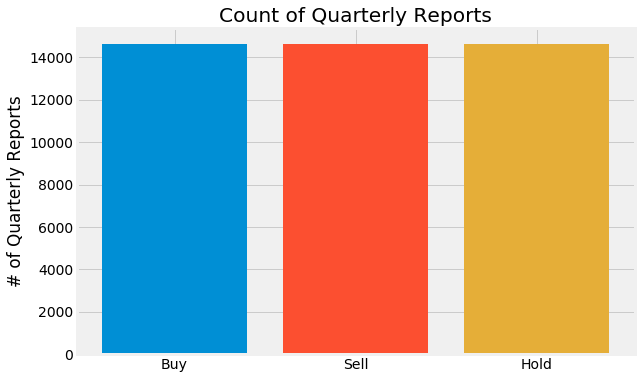

In [4]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')

# Plotting the count of each DataFrame of each class
plt.bar("Buy", buy_df.shape[0])
plt.bar("Sell", sell_df.shape[0])
plt.bar("Hold", hold_df.shape[0])

plt.ylabel("# of Quarterly Reports")
plt.title('Count of Quarterly Reports')
plt.show()

### Plotting the Returns each Quarterly Report will have based on class

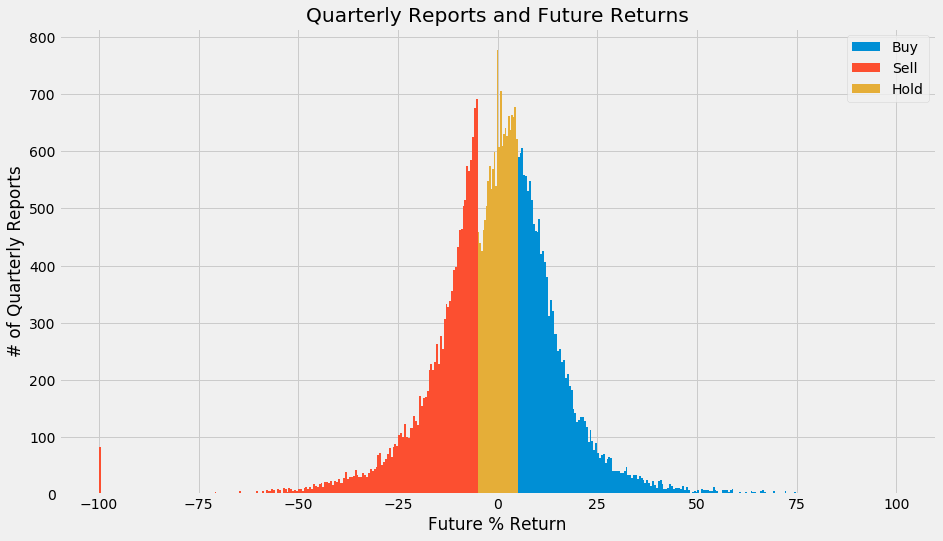

In [5]:
plt.figure(figsize=(14,8))
plt.style.use('fivethirtyeight')

# Plotting the distribution of each DF's Future % return
buy_df[buy_df['Future % Return']<=100]['Future % Return'].hist(bins=200, label='Buy')
sell_df['Future % Return'].hist(bins=200, label='Sell')
hold_df['Future % Return'].hist(bins=25, label='Hold')


plt.title("Quarterly Reports and Future Returns")
plt.ylabel("# of Quarterly Reports")
plt.xlabel("Future % Return")
plt.legend()
plt.show()

## Correlations
Checking for any correlation between the future quarterly report's price and the current quarter's features.

#### Function for Visualizing and Correlation Matrix

In [6]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

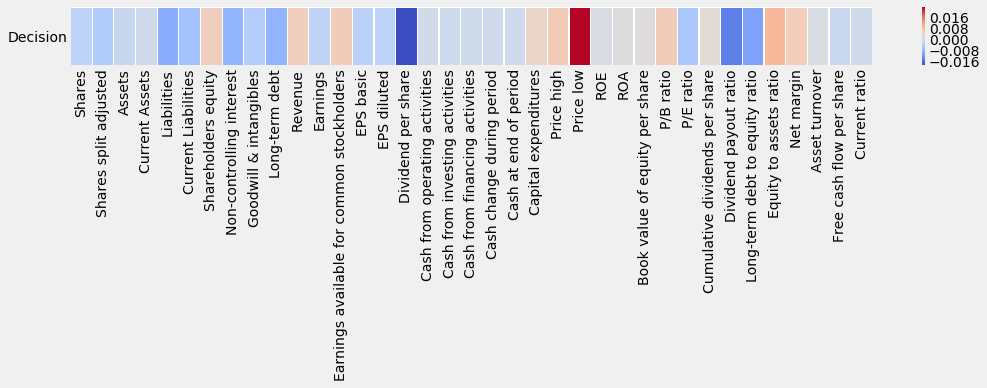

In [7]:
# Correlation DF of all classes
corr = final_df.corr().iloc[[-2],:-2].drop(['Price', 'Future % Return'], 1)

# Plotting the Correlation DF as a heatmap
plt.figure(figsize=(16,1))
sns.heatmap(corr, annot=False, linewidths=.1, cmap="coolwarm")
plt.xticks()
plt.yticks(rotation=0)
plt.show()

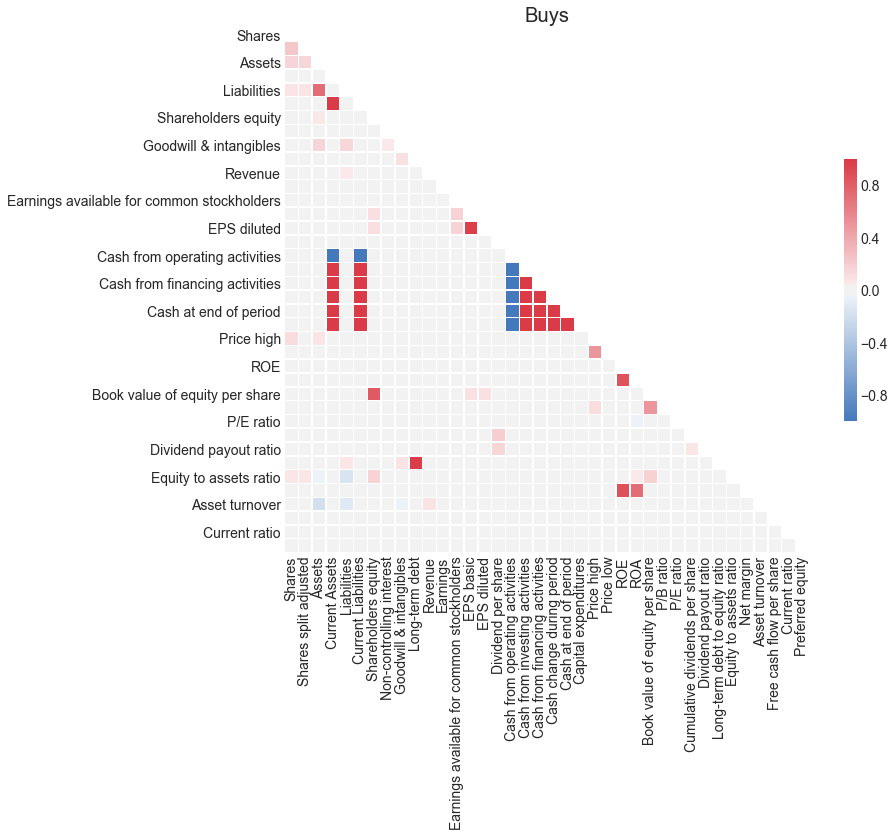

In [8]:
# Correlation for Buy DF
corr = buy_df.drop(['Future % Return', 'Price'], 1).corr()

CorrMtx(corr)
plt.title("Buys");

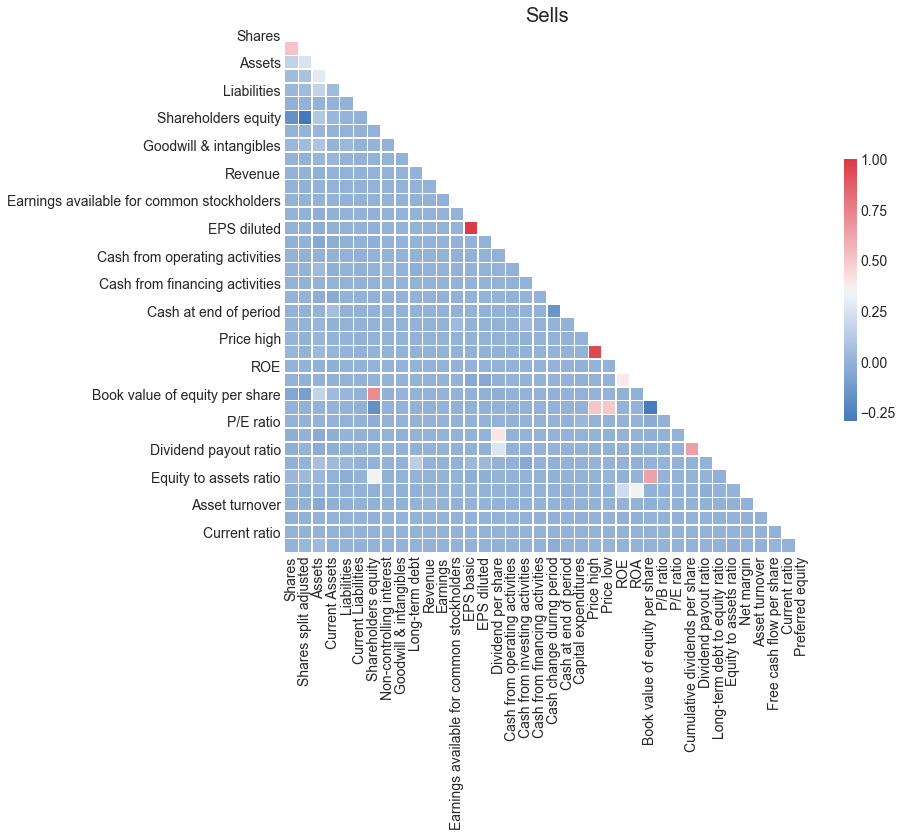

In [9]:
# Correlation for Sell DF
corr = sell_df.drop(['Future % Return', 'Price'], 1).corr()

# Plotting
CorrMtx(corr)
plt.title("Sells");

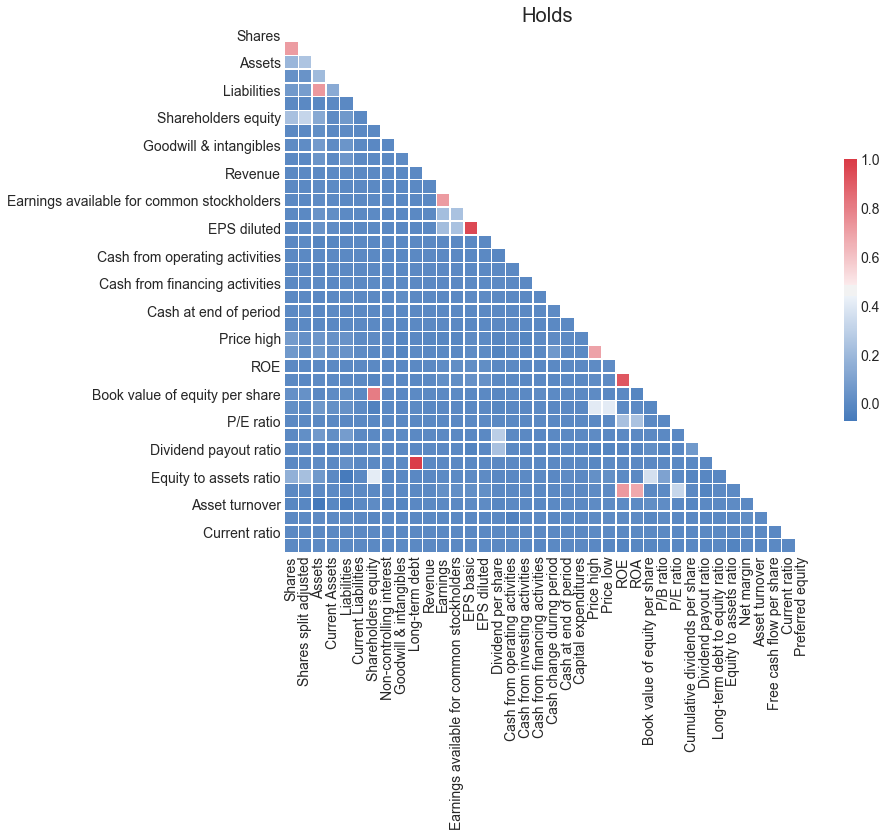

In [10]:
# Correlation for Hold DF
corr = hold_df.drop(['Future % Return', 'Price'], 1).corr()

# Plotting
CorrMtx(corr)
plt.title("Holds");

## Exploration of each class

### Transforming/Scaling the Data
Scaling using Min Max to preserve the shape of the original distribution.

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [12]:
# Scaling each of the class DataFrames
buy_df  = pd.DataFrame(scaler.fit_transform(buy_df), index=buy_df.index, columns=buy_df.columns)
hold_df = pd.DataFrame(scaler.fit_transform(hold_df), index=hold_df.index, columns=hold_df.columns)
sell_df = pd.DataFrame(scaler.fit_transform(sell_df), index=sell_df.index, columns=sell_df.columns)

### Plotting each Class
Determining which features have the most impact on buy, sell, hold. No bearing on stock.

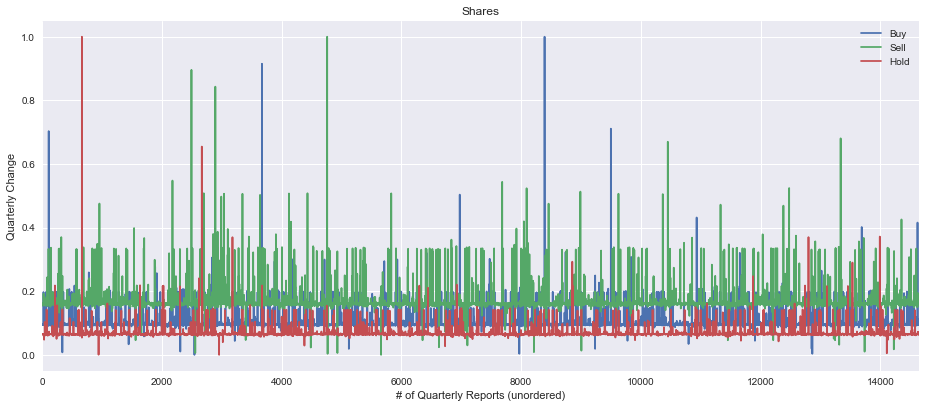

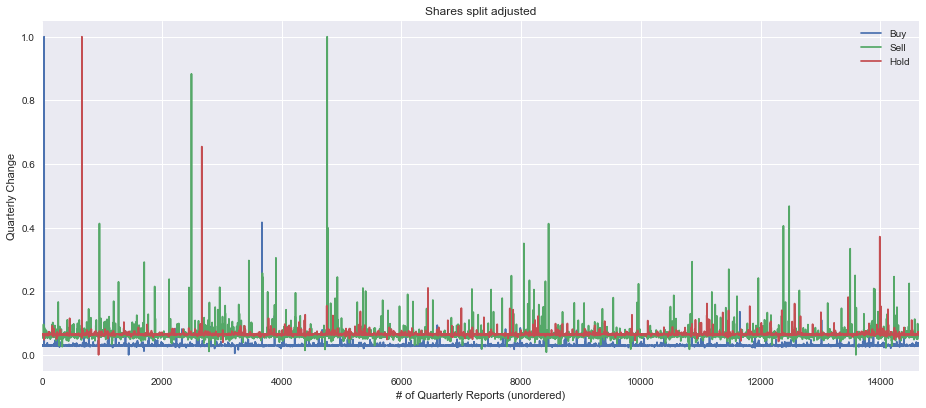

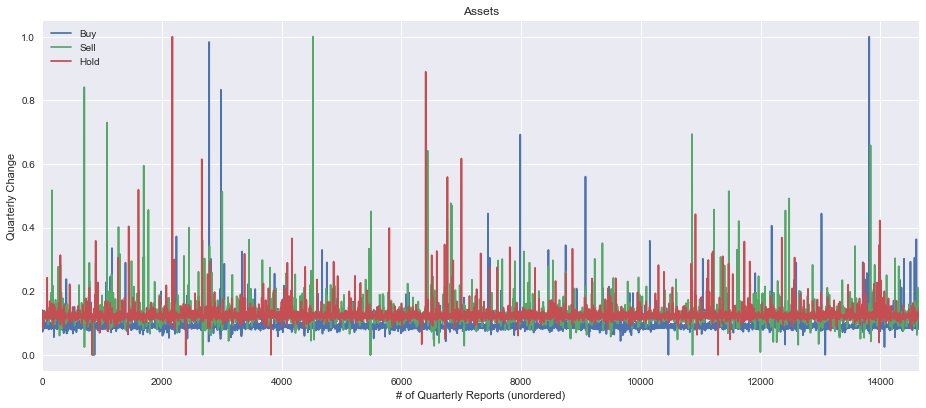

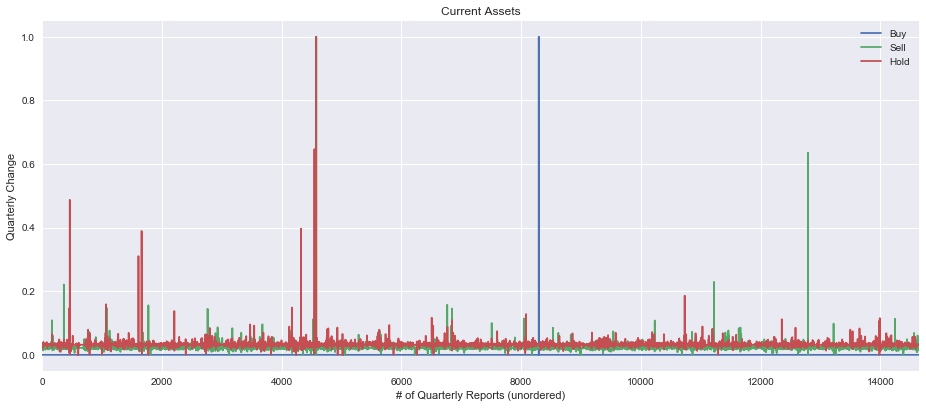

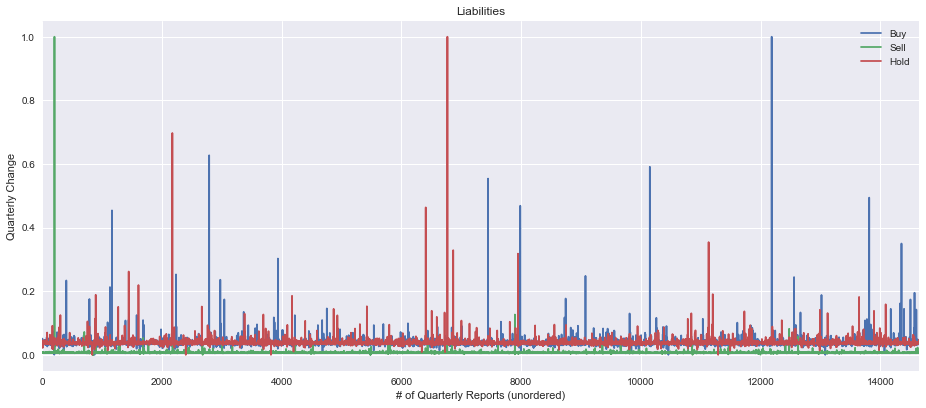

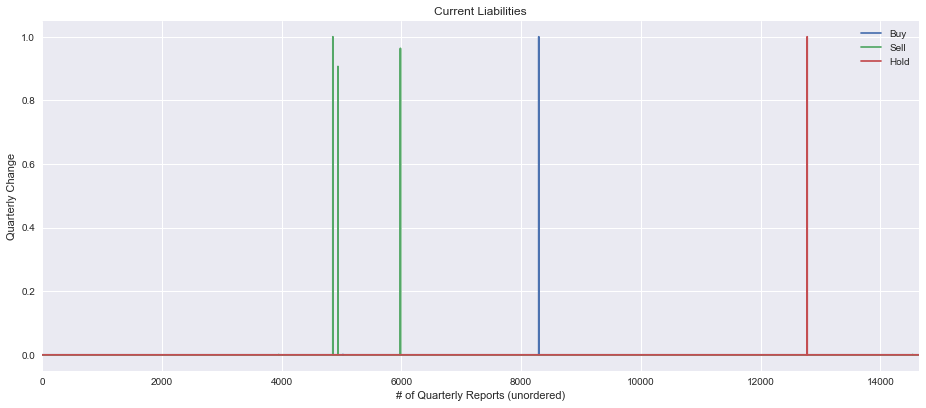

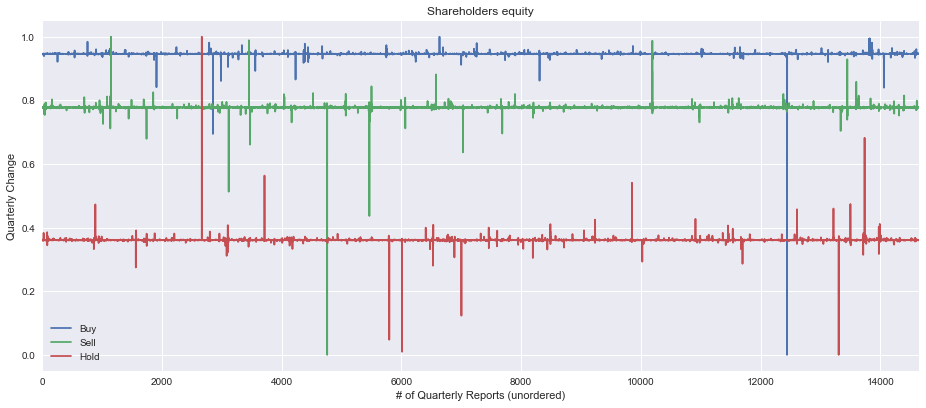

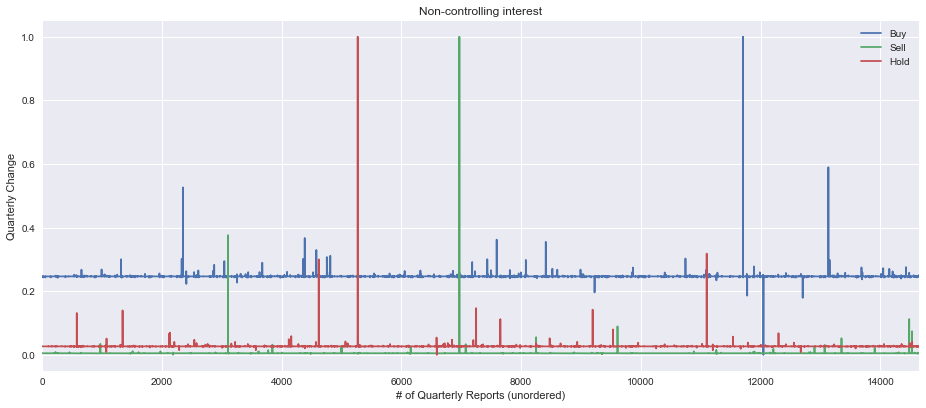

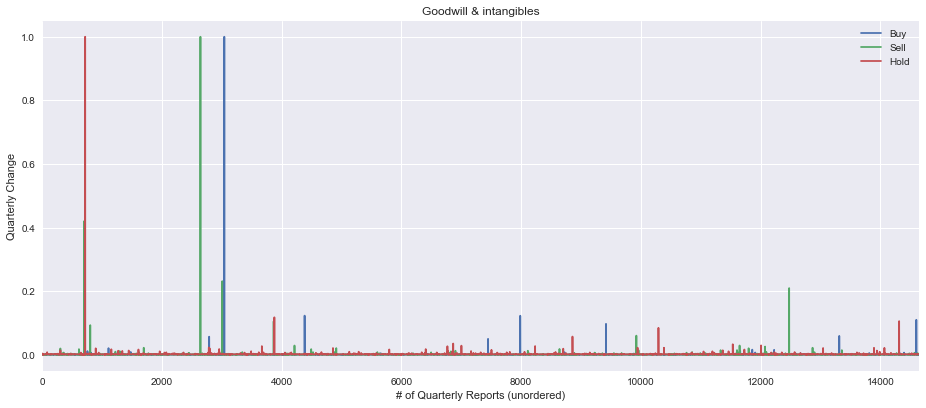

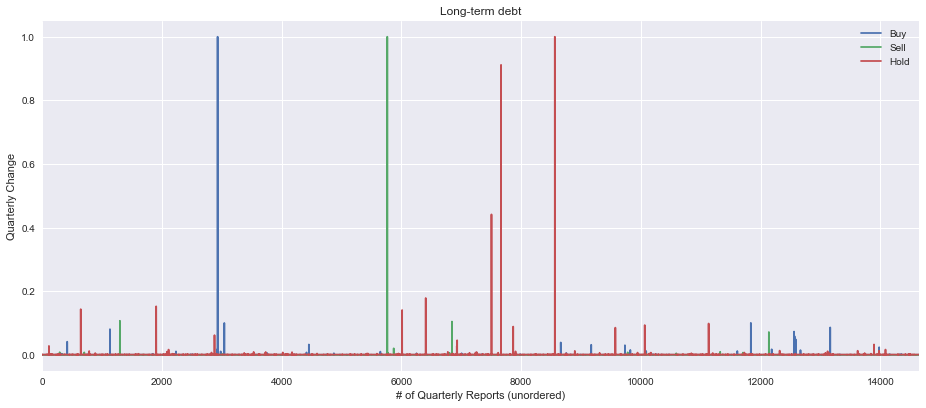

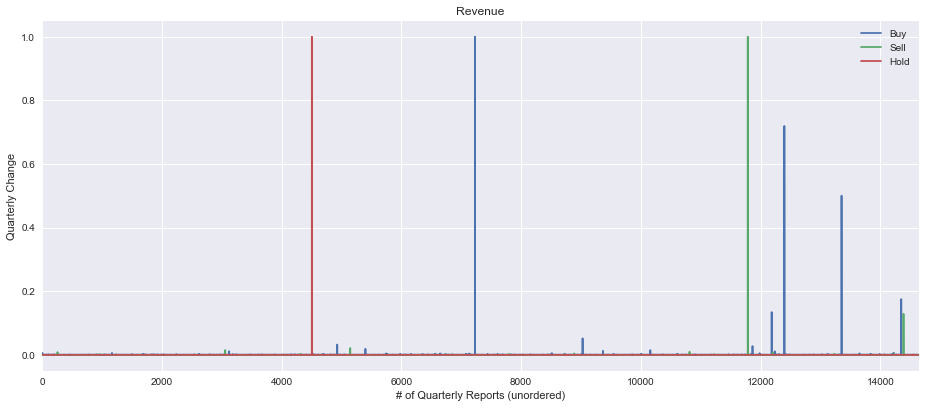

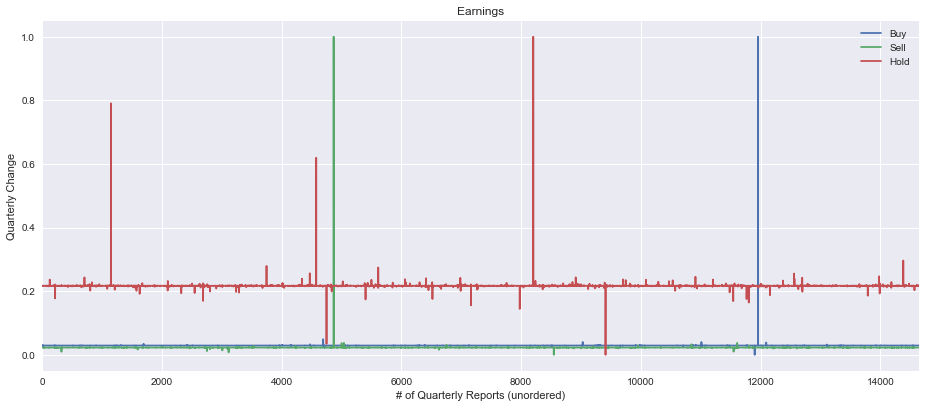

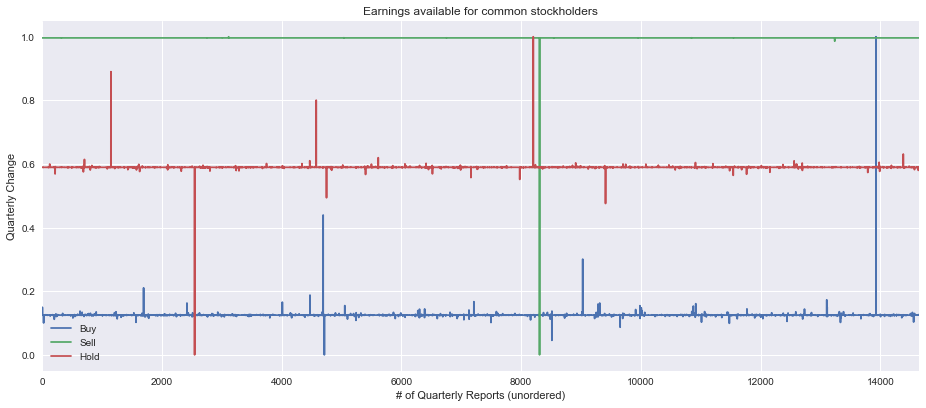

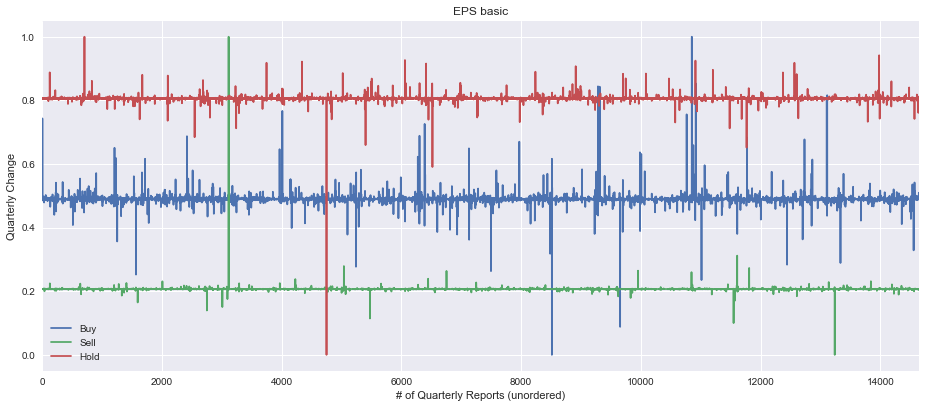

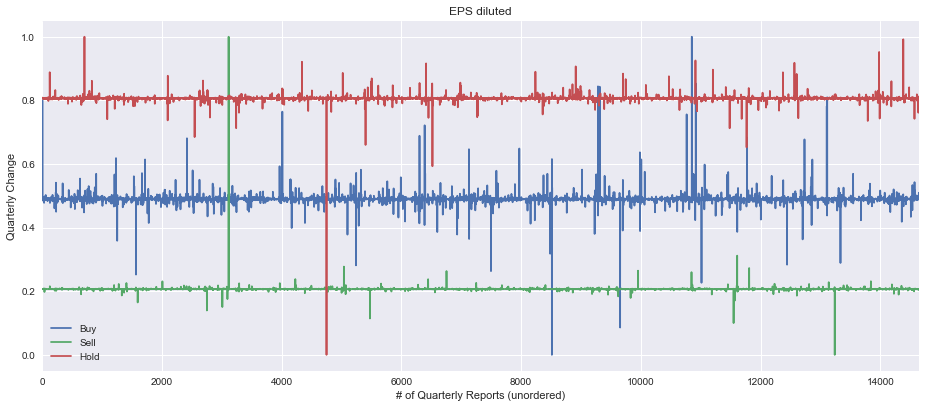

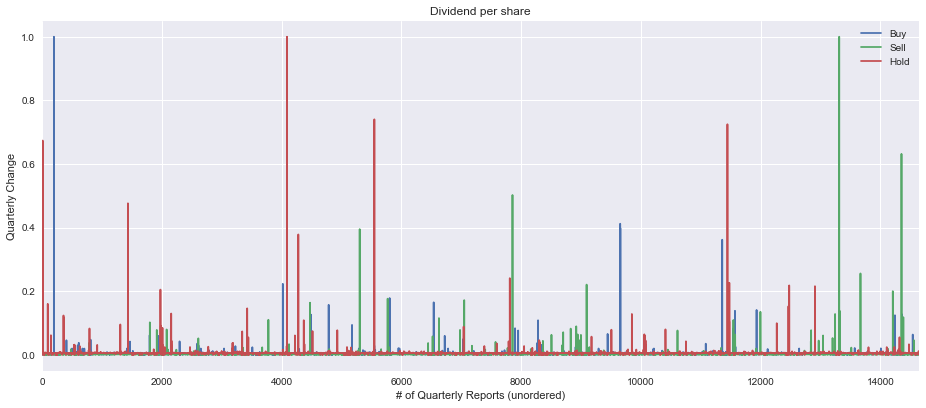

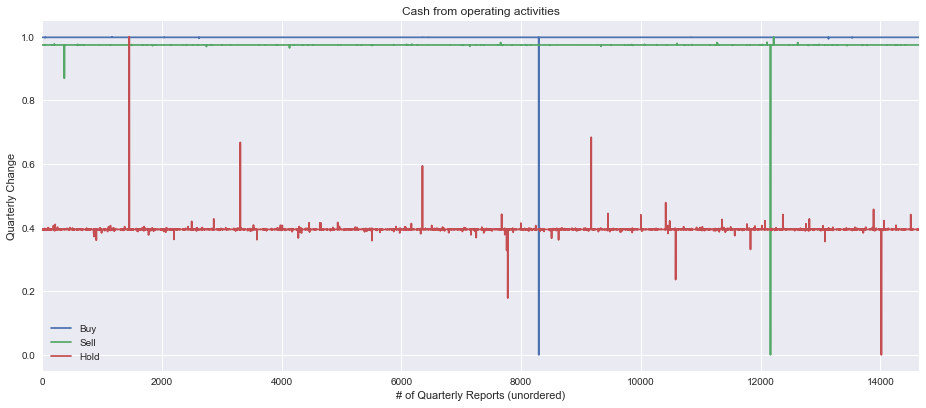

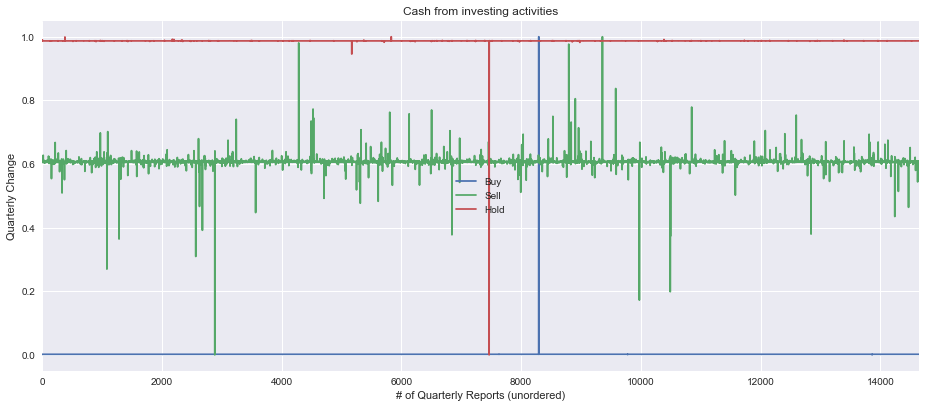

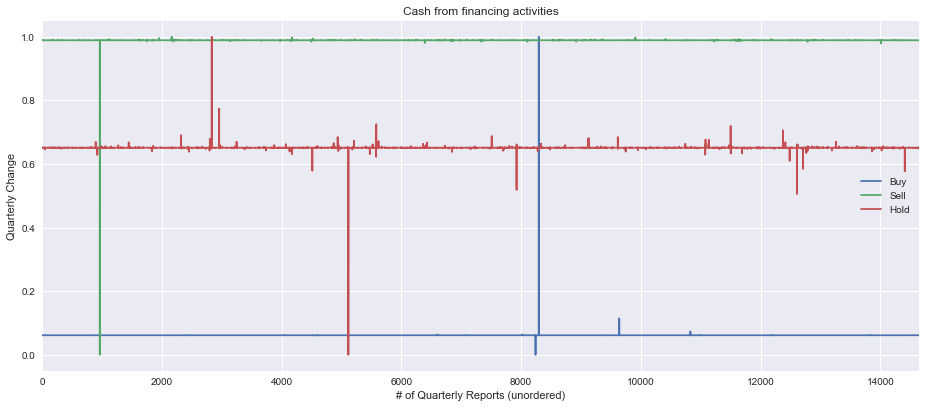

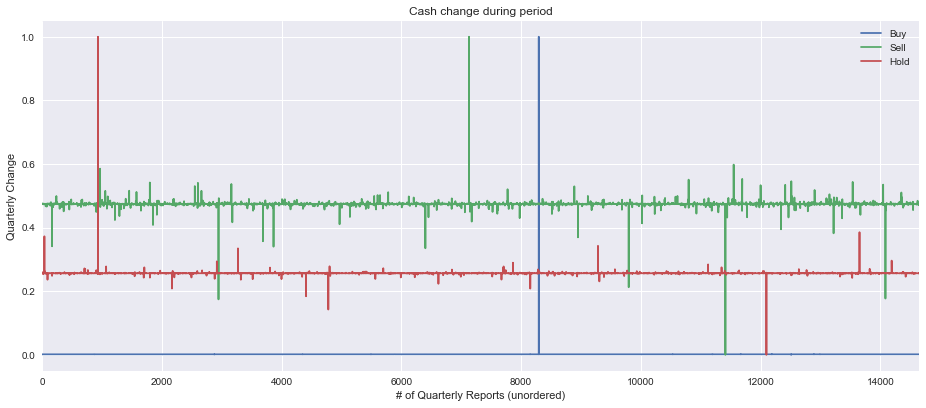

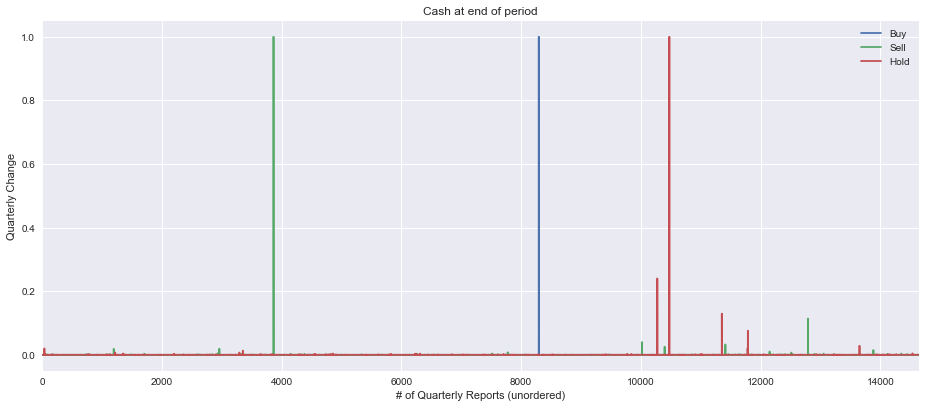

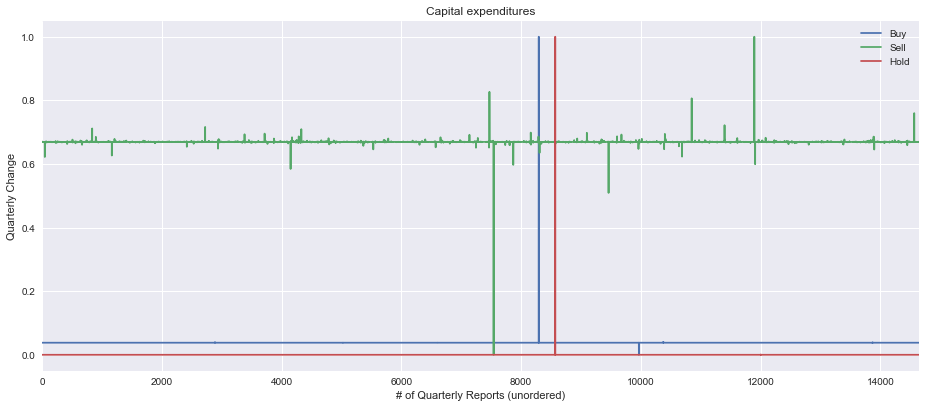

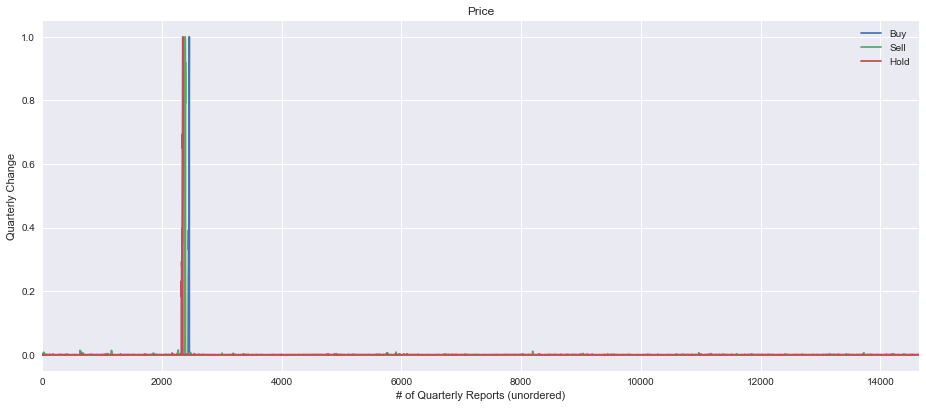

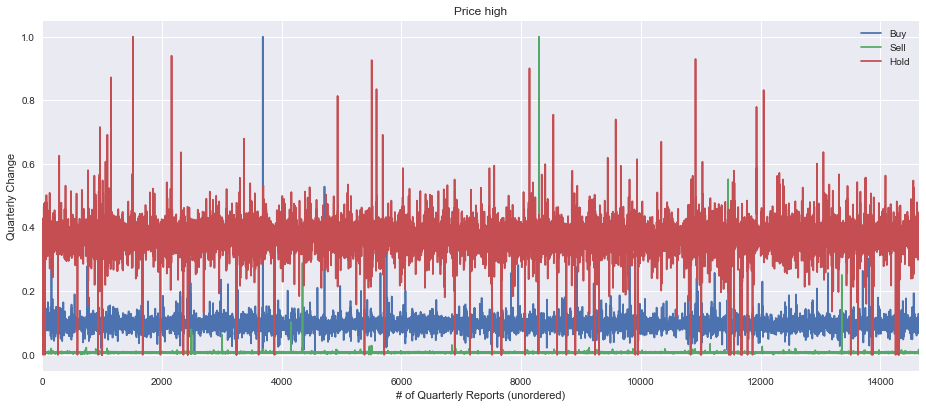

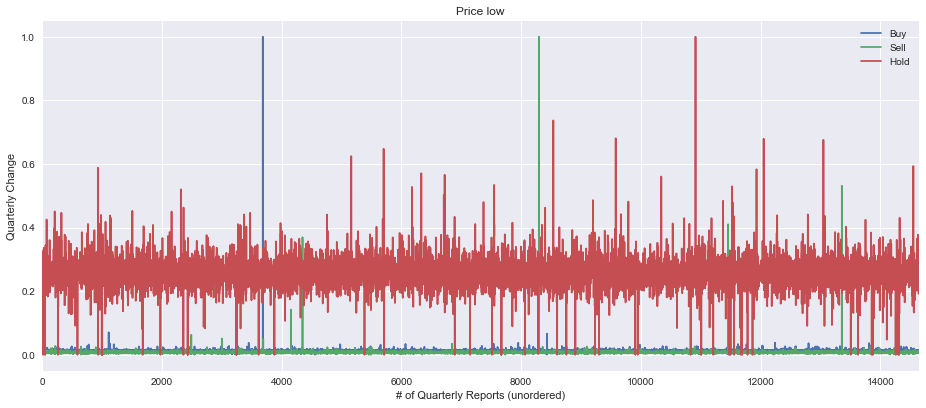

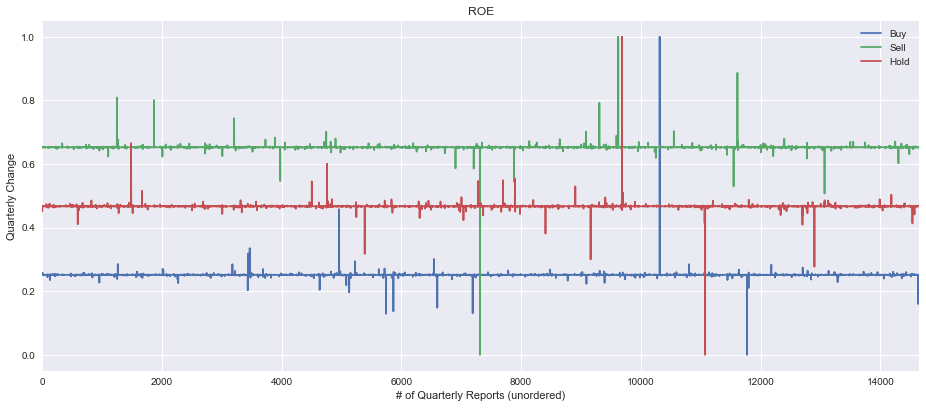

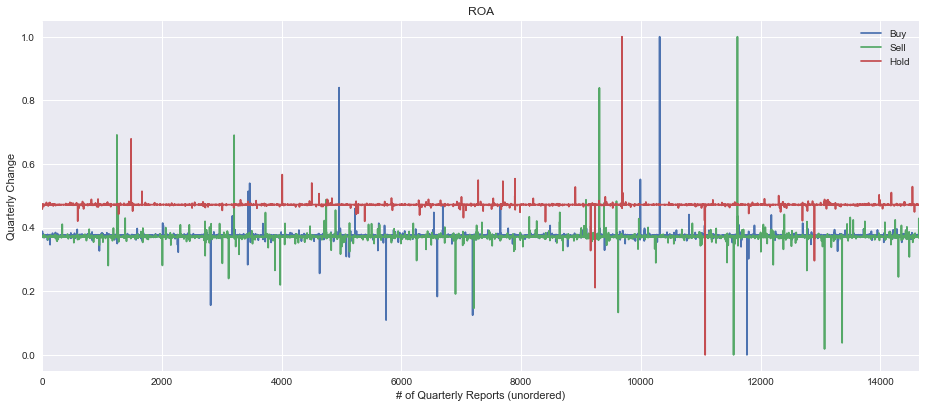

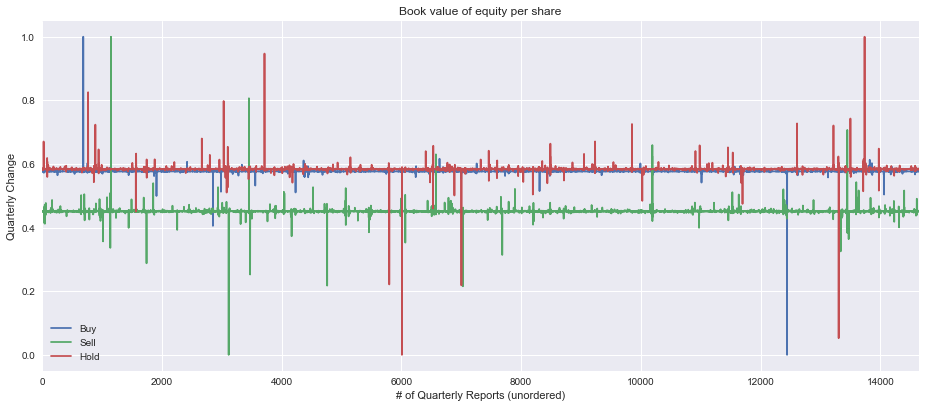

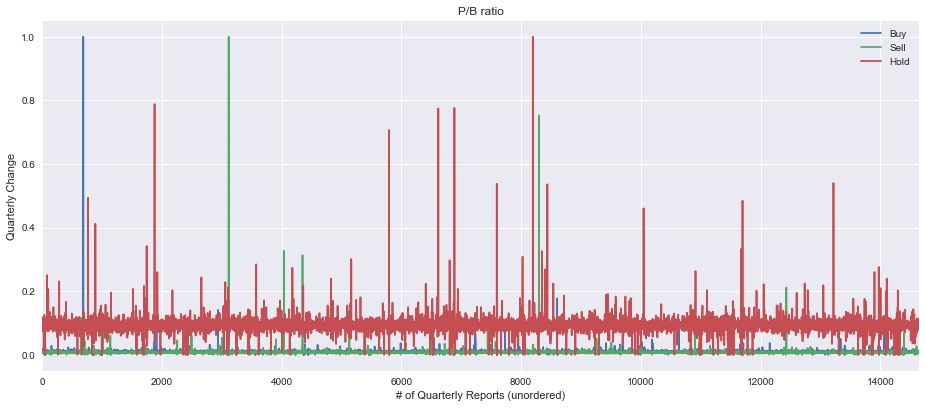

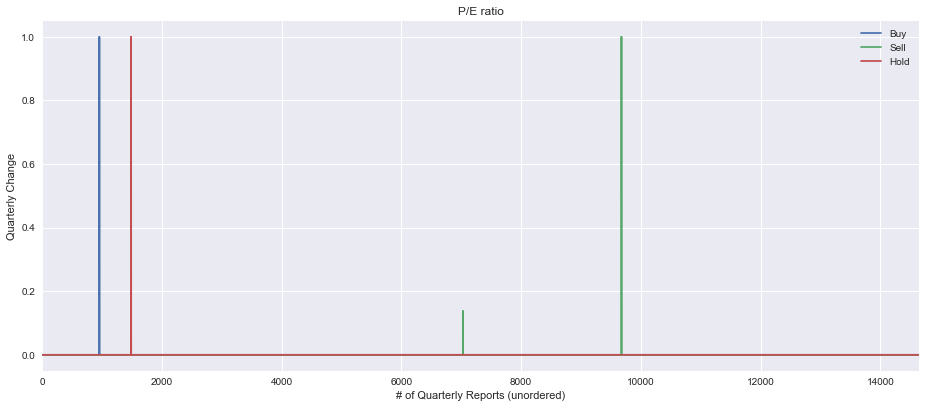

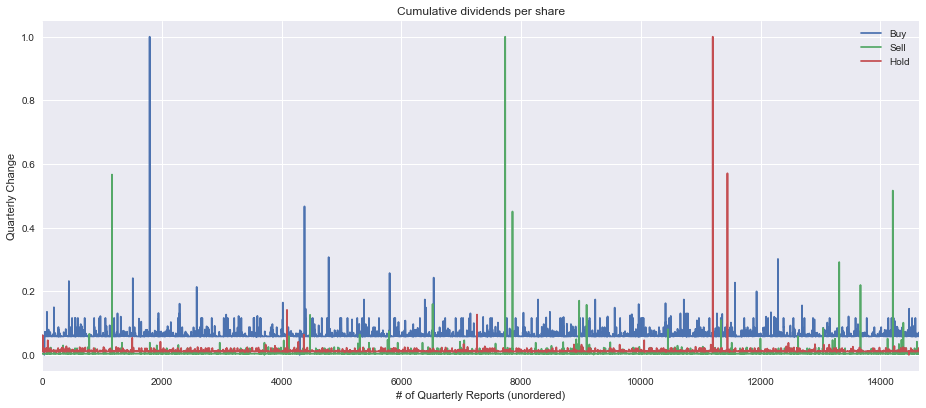

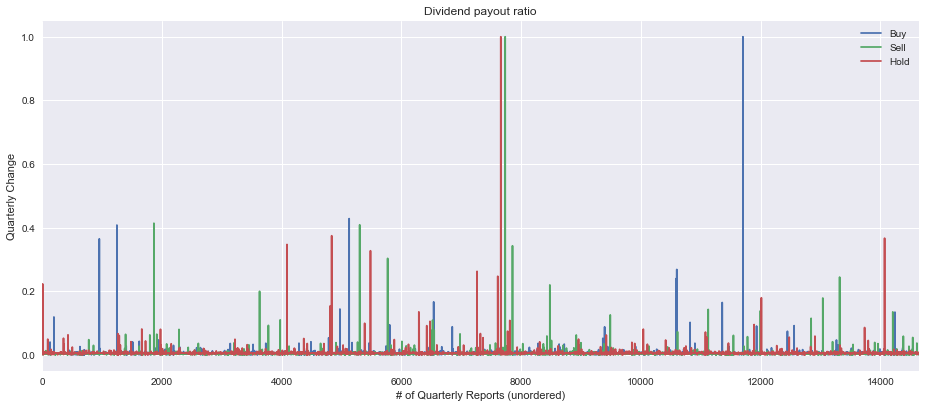

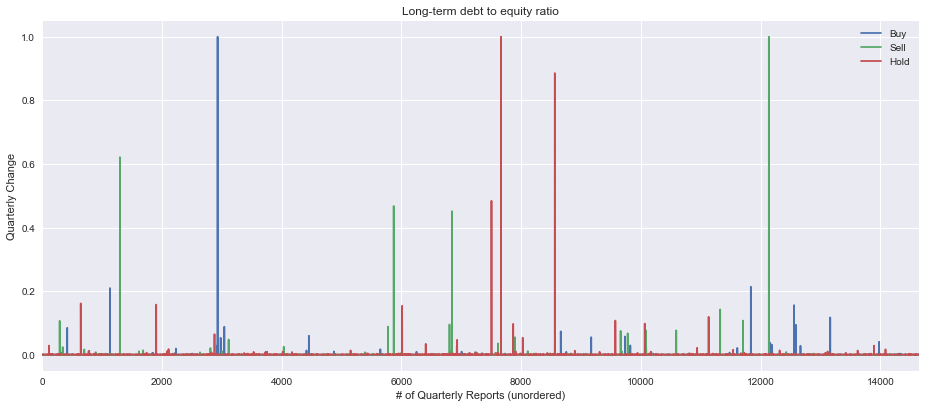

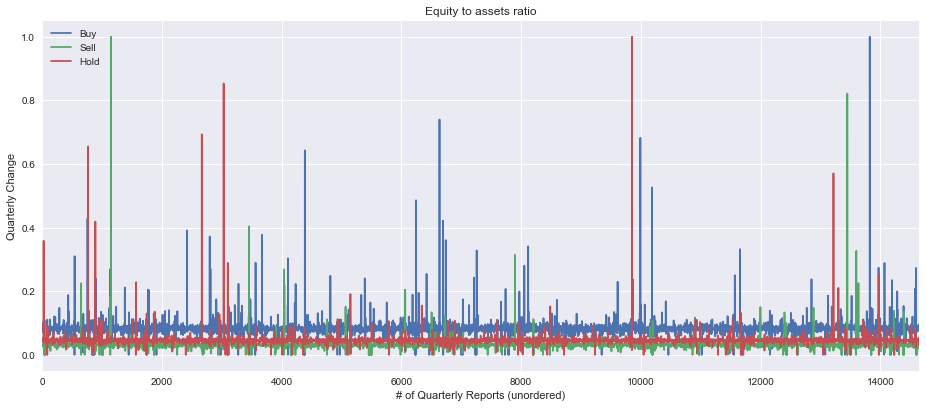

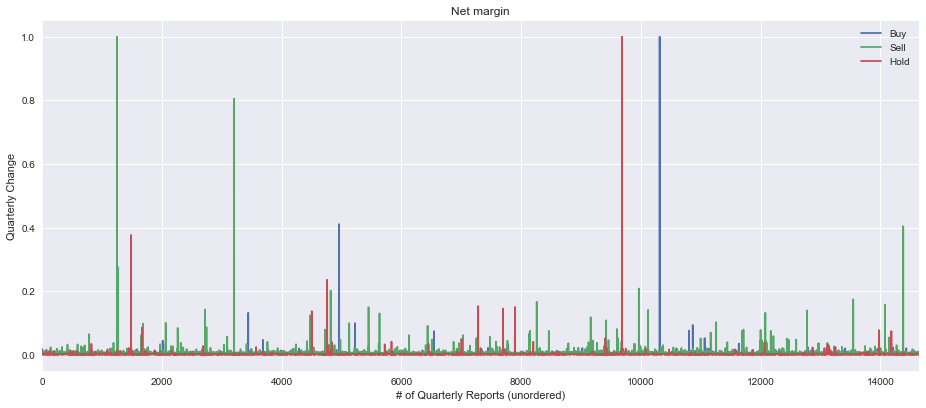

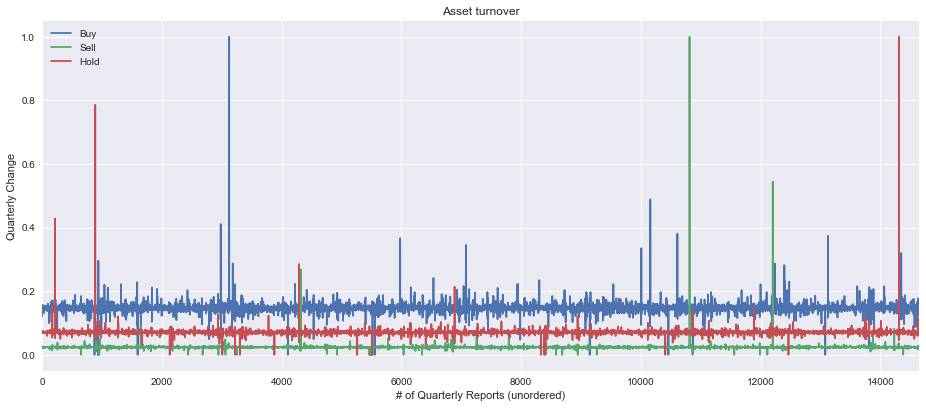

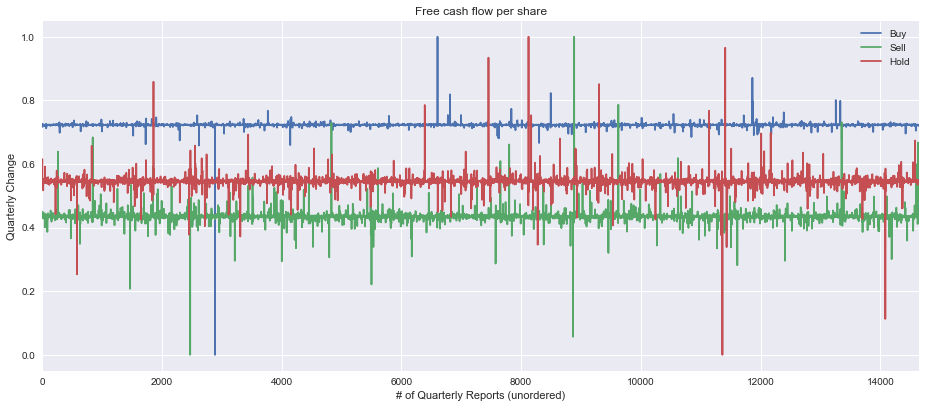

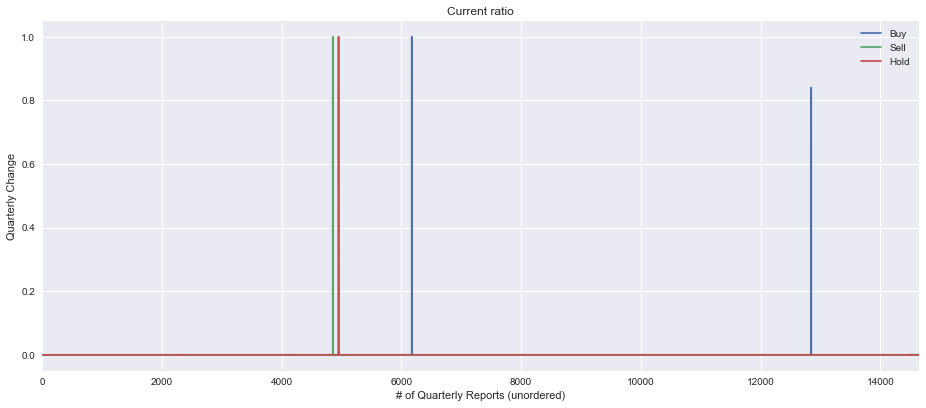

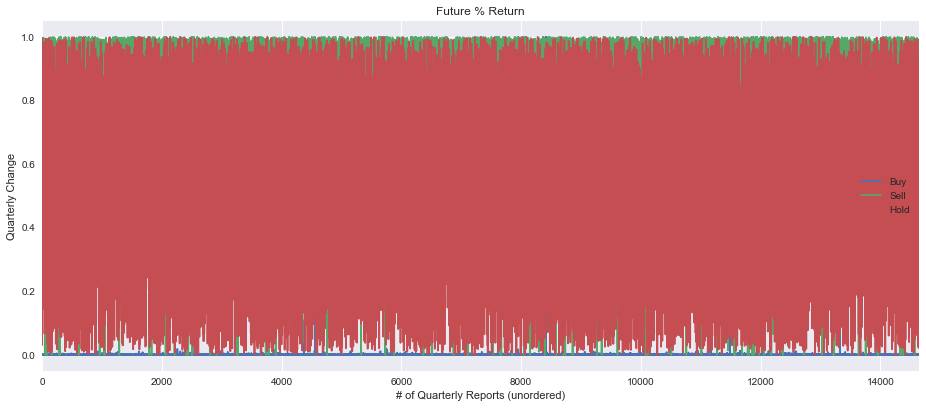

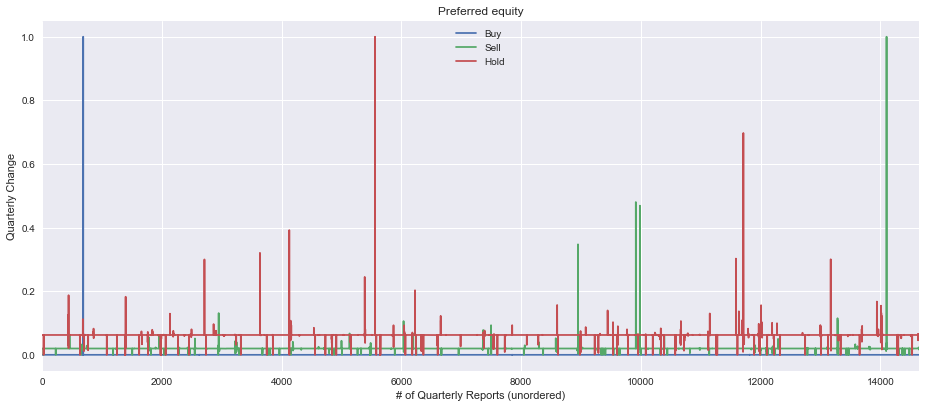

In [13]:
plt.style.use('seaborn')

# Plotting the features for each class
for i in buy_df.columns:
    plt.figure(figsize=(14,6))

    buy_df[i].plot(label='Buy')
    sell_df[i].plot(label='Sell')
    hold_df[i].plot(label='Hold')

    plt.ylabel("Quarterly Change")
    plt.xlabel("# of Quarterly Reports (unordered)")
    plt.legend()
    plt.title(f"{i}")
    plt.show()

Counting the significant quarterly reports in each feature and determining which reports are the most prevalent in each feature.

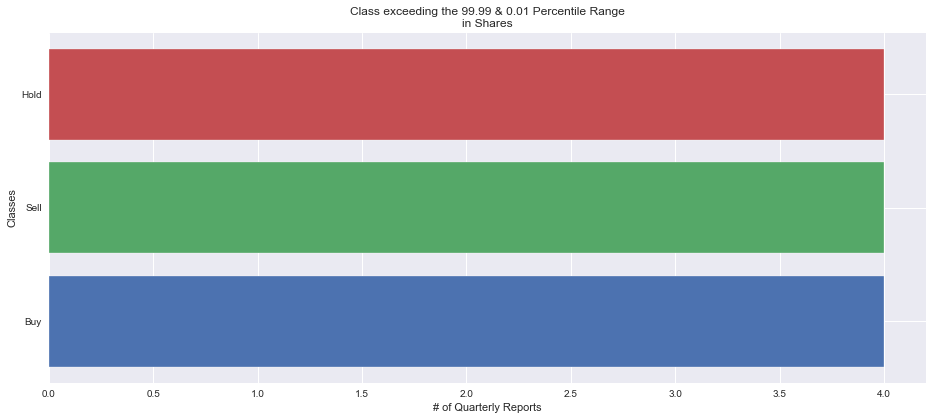

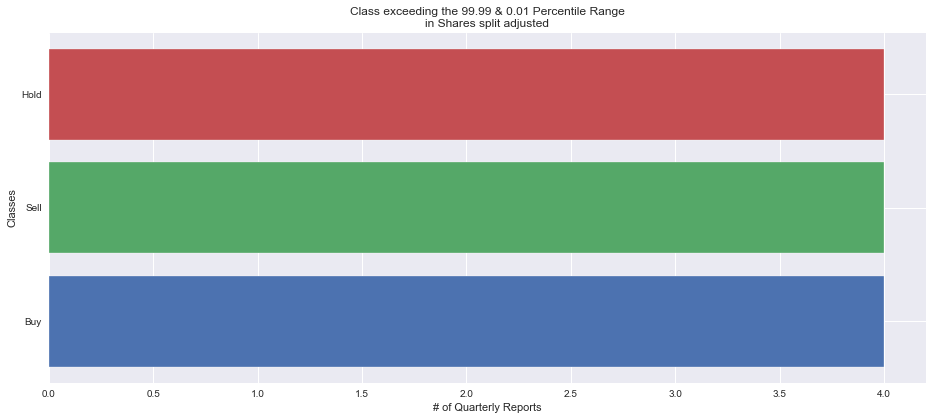

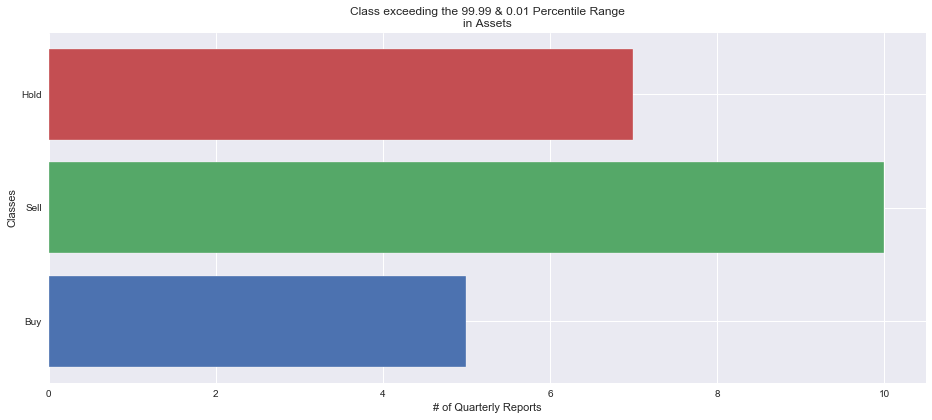

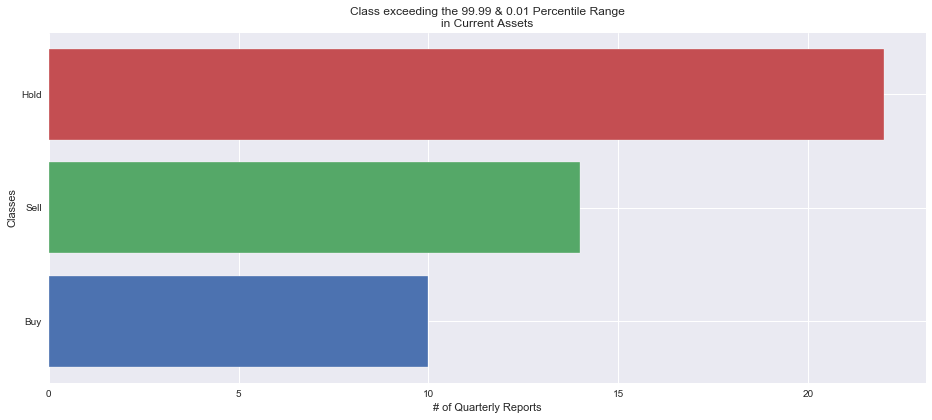

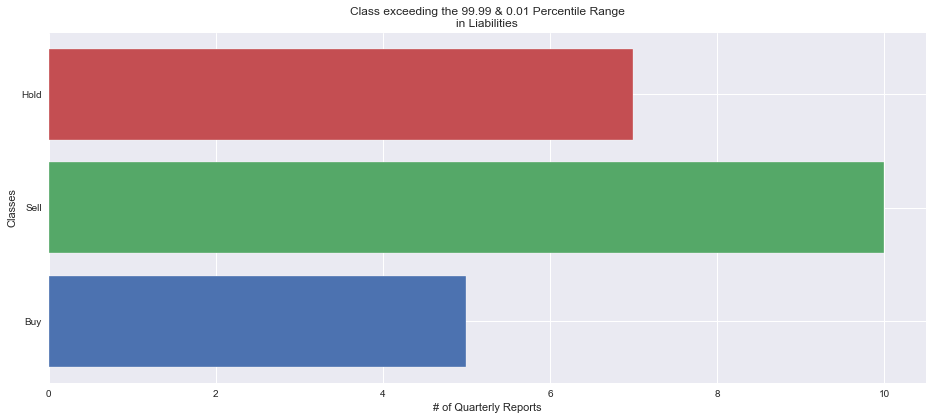

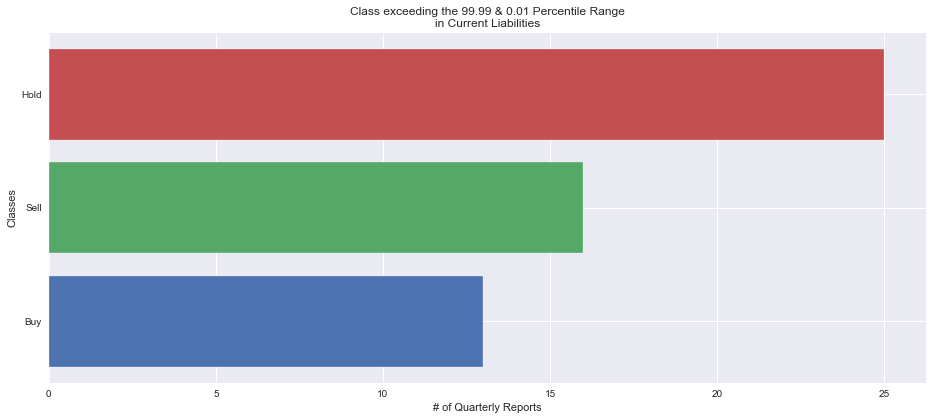

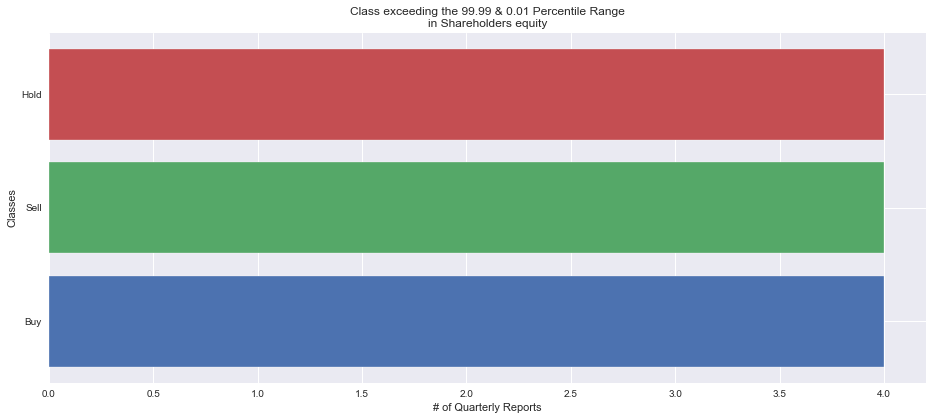

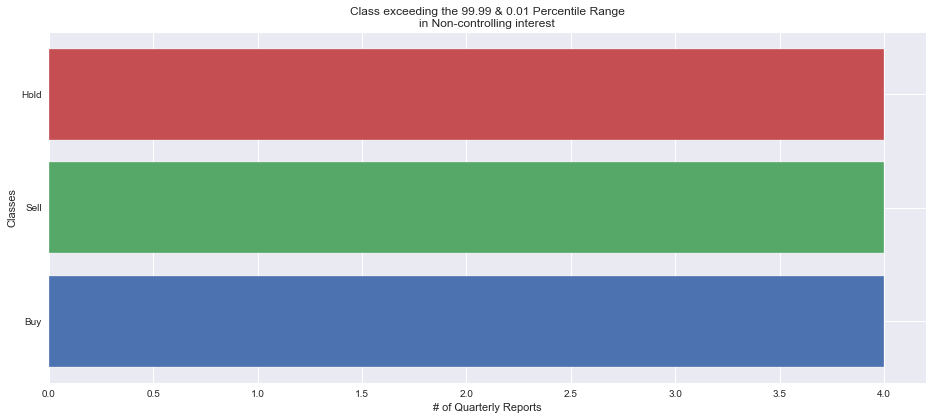

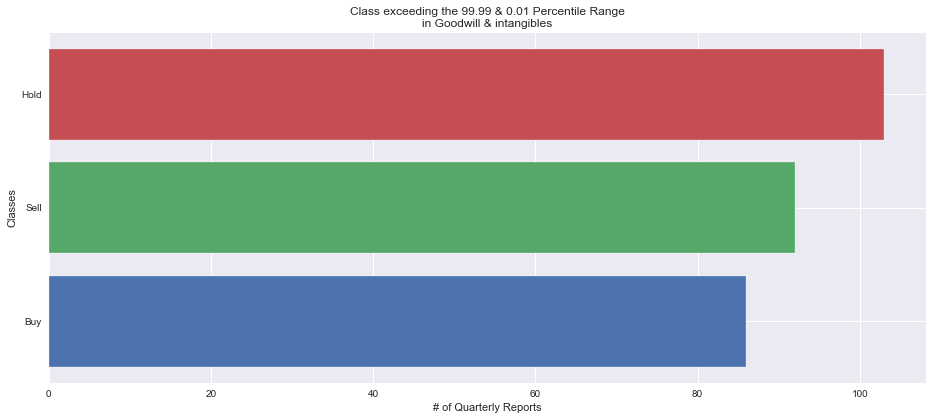

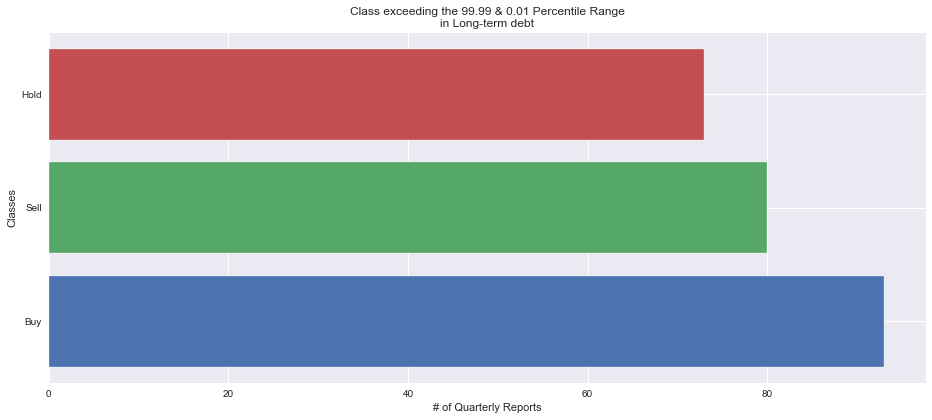

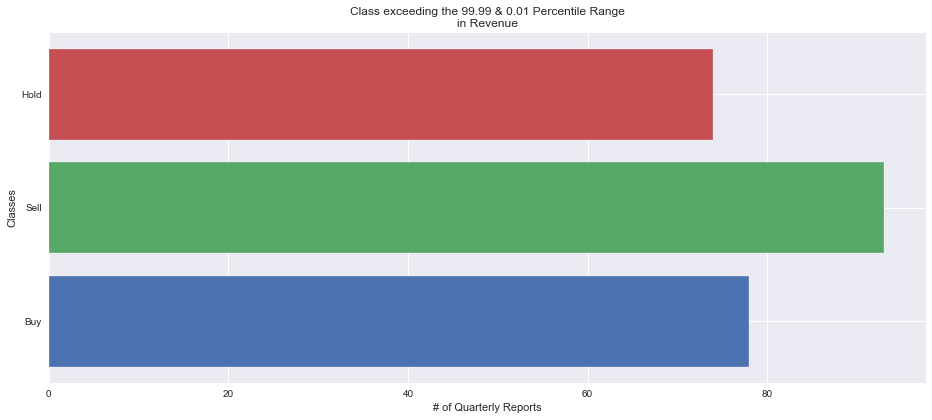

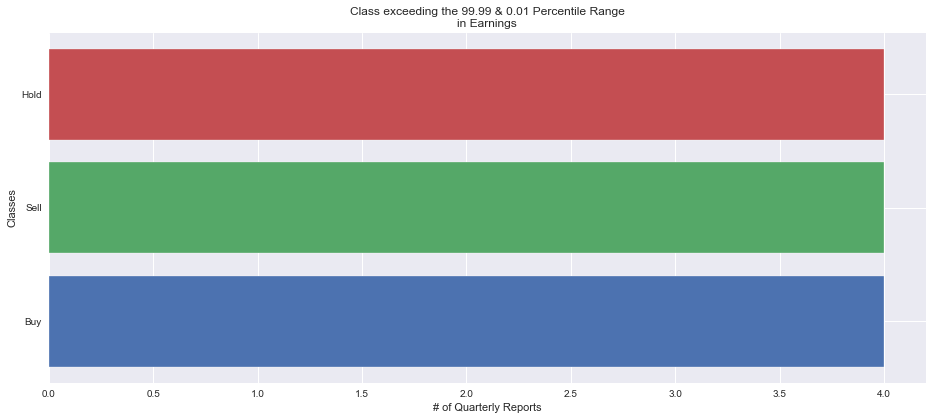

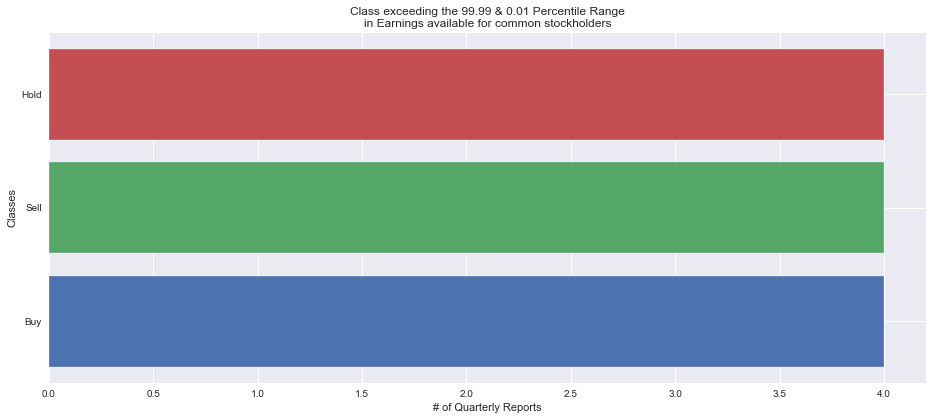

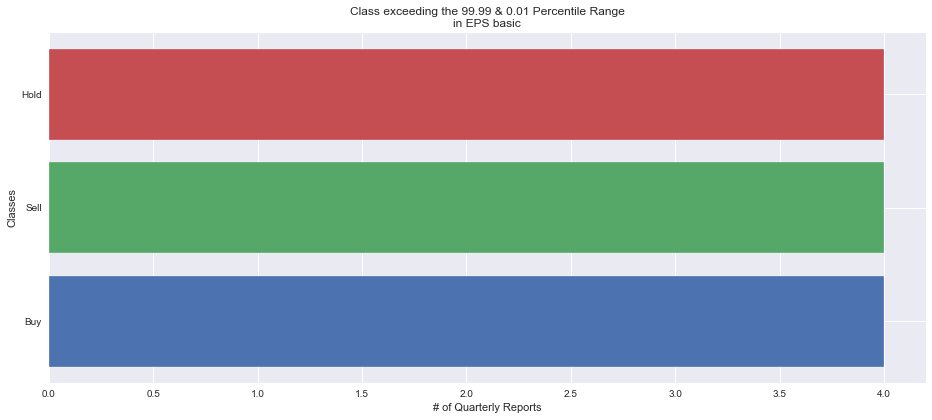

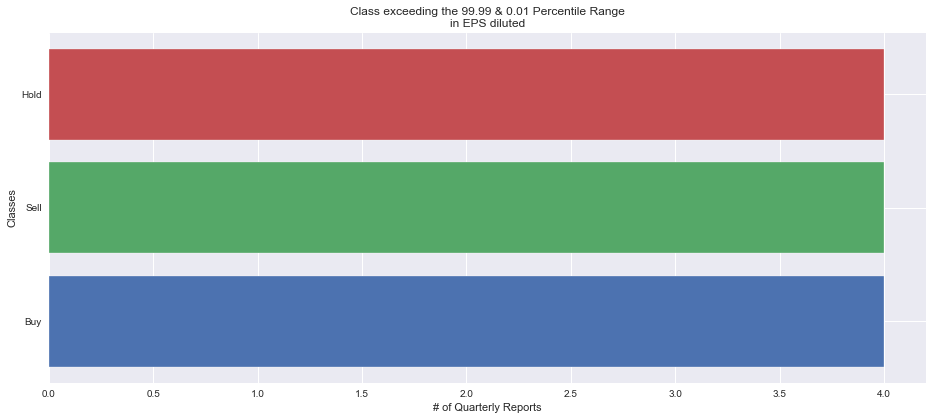

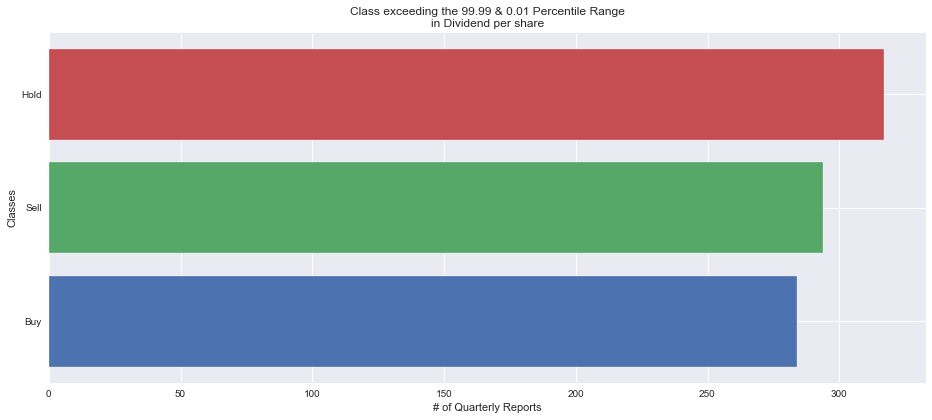

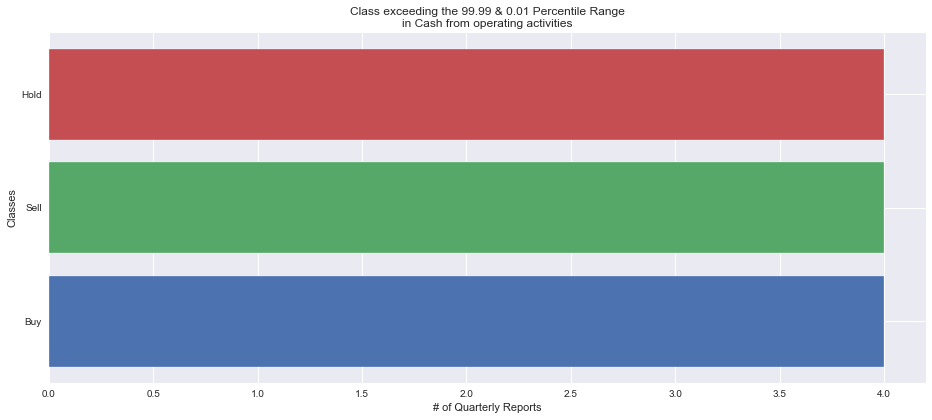

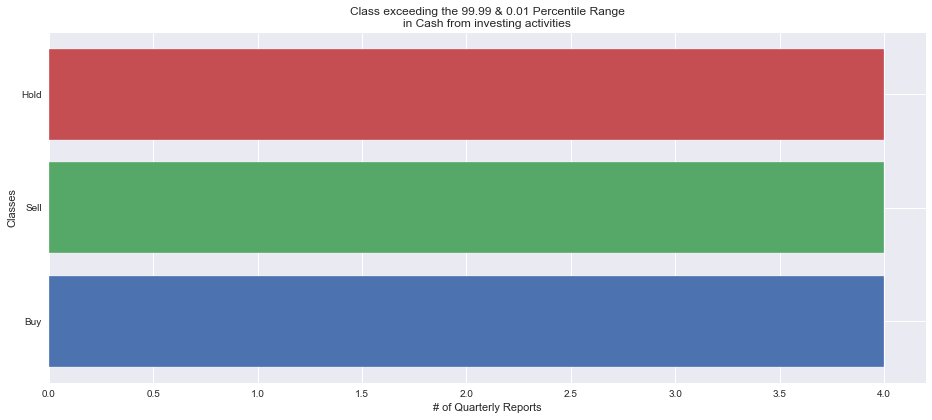

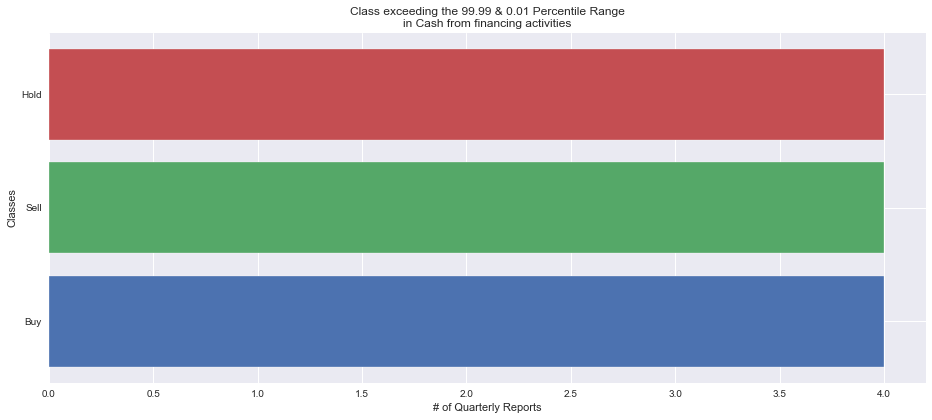

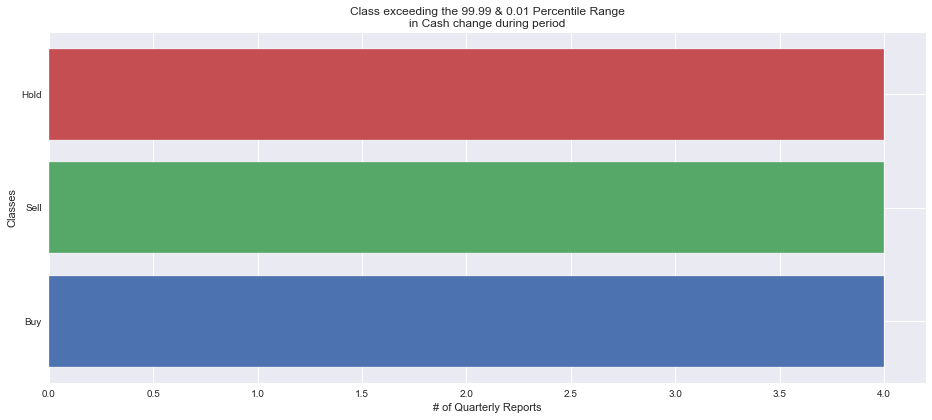

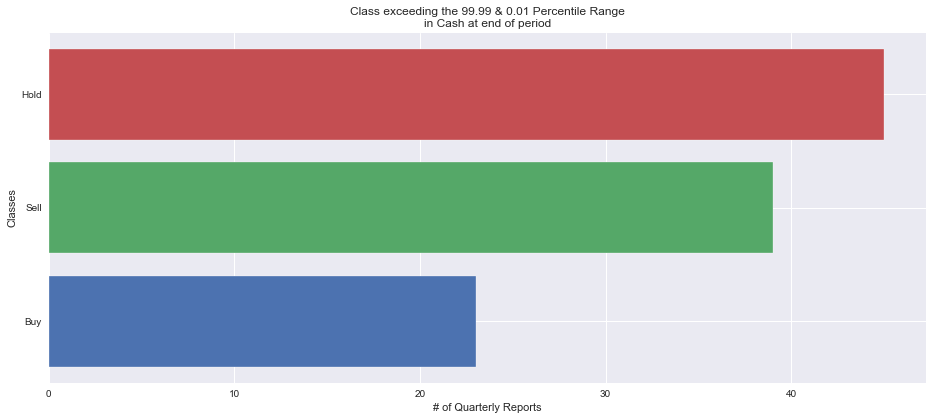

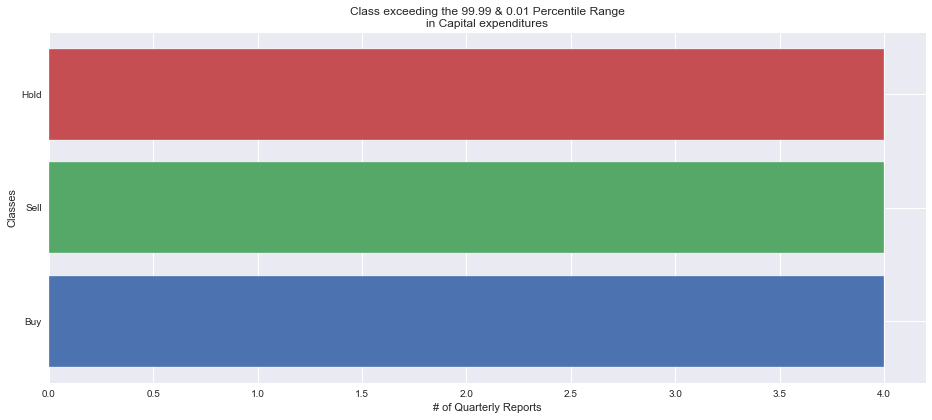

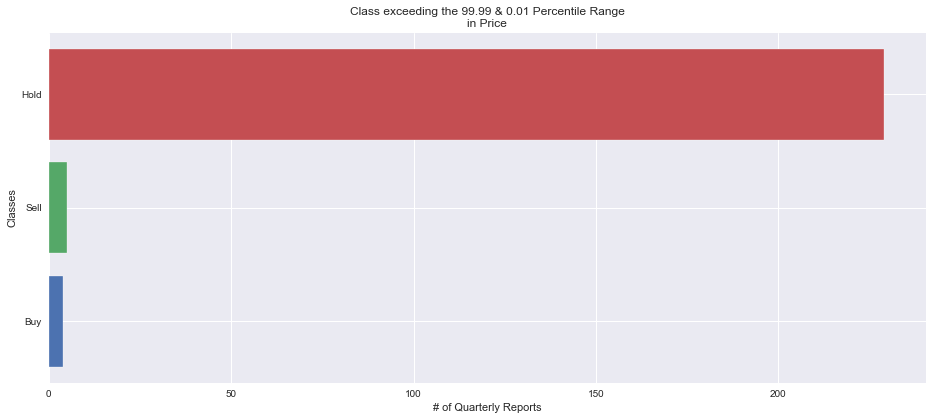

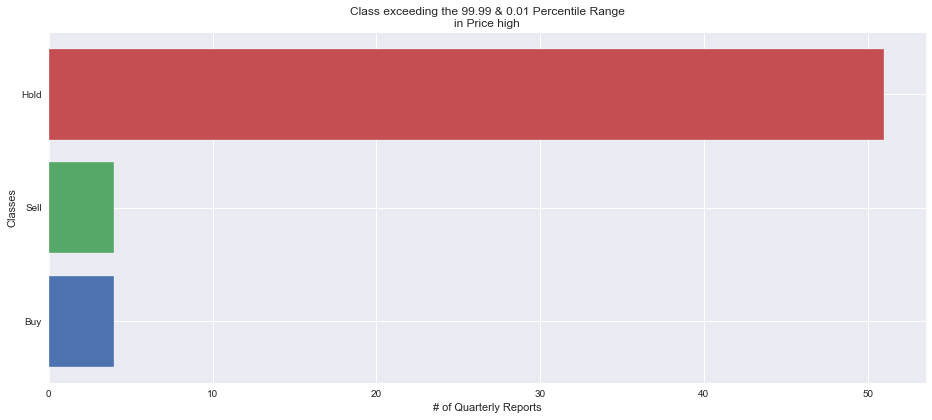

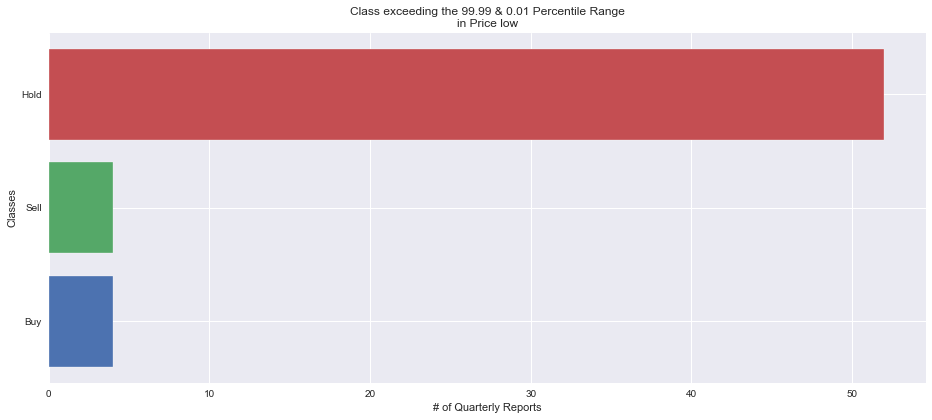

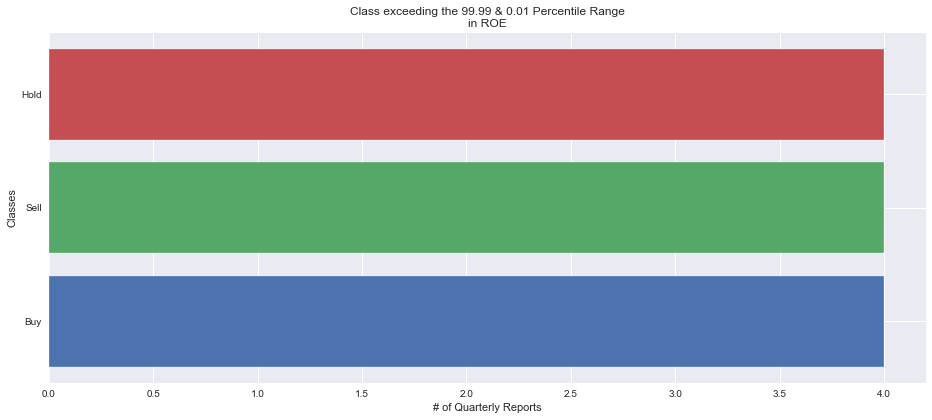

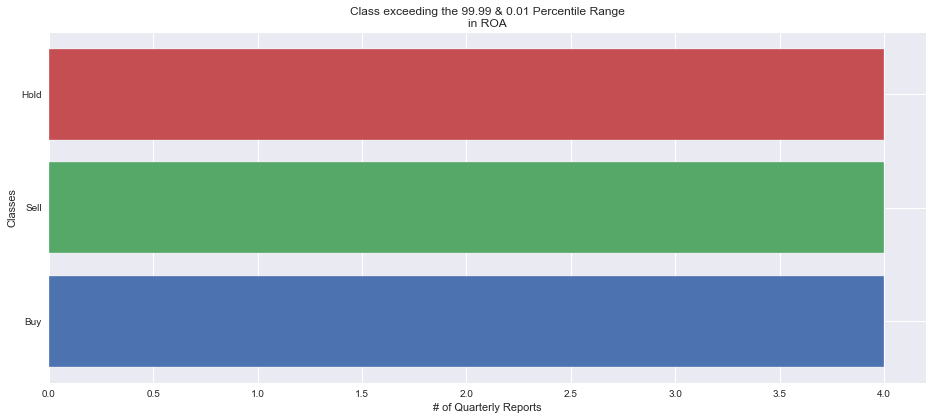

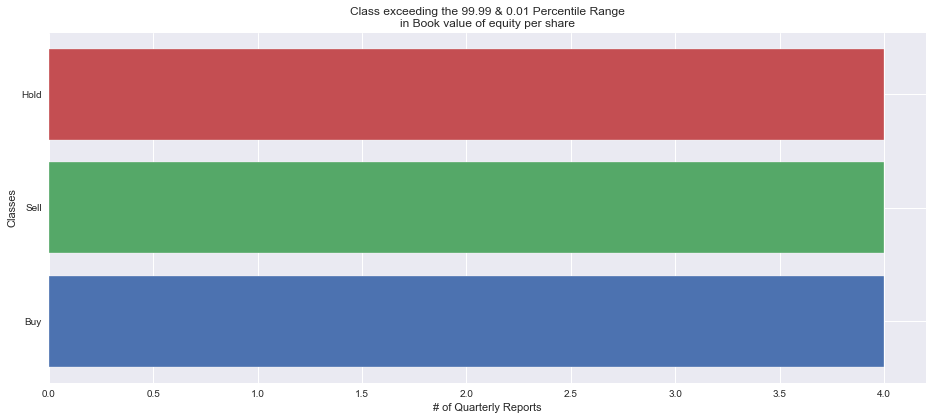

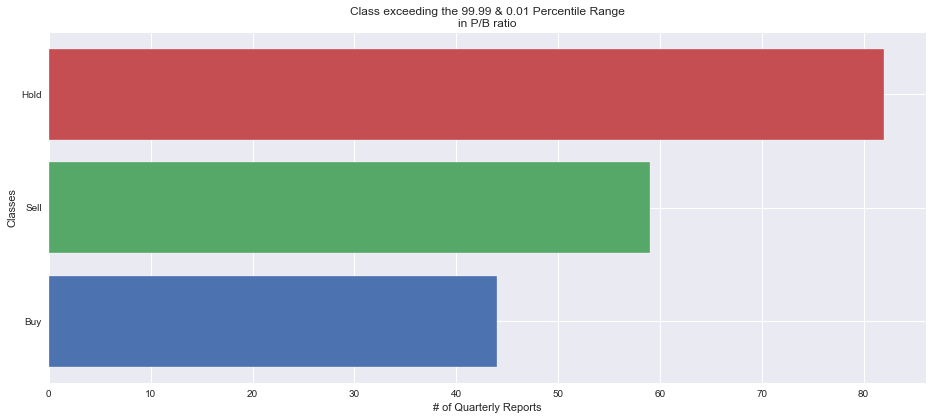

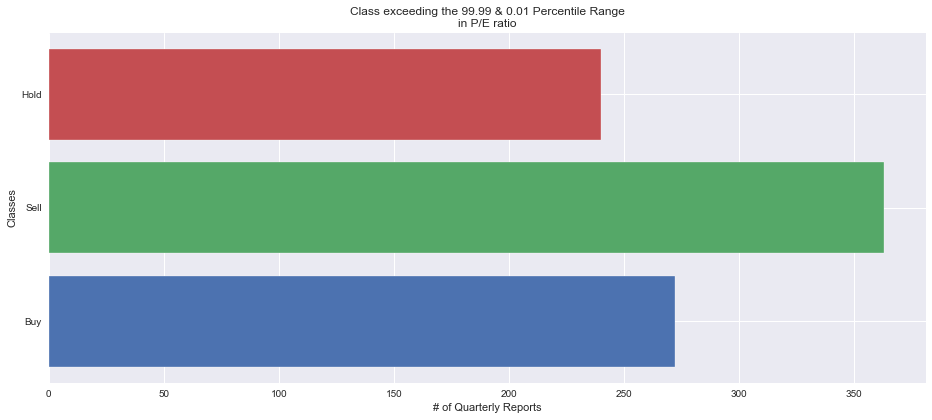

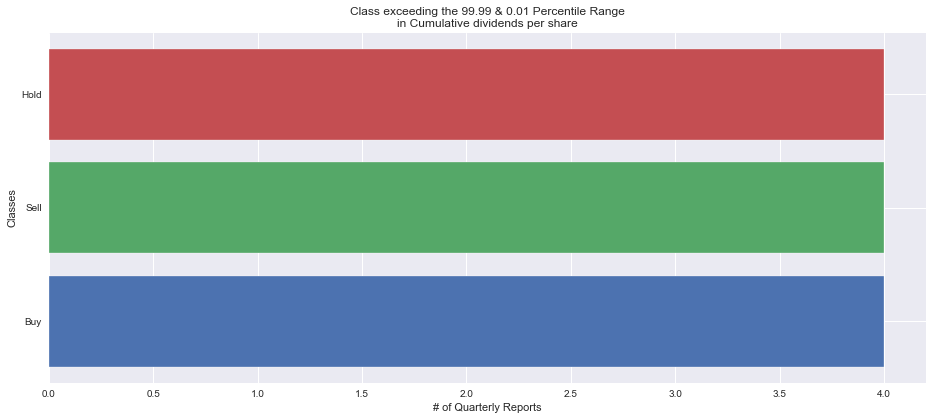

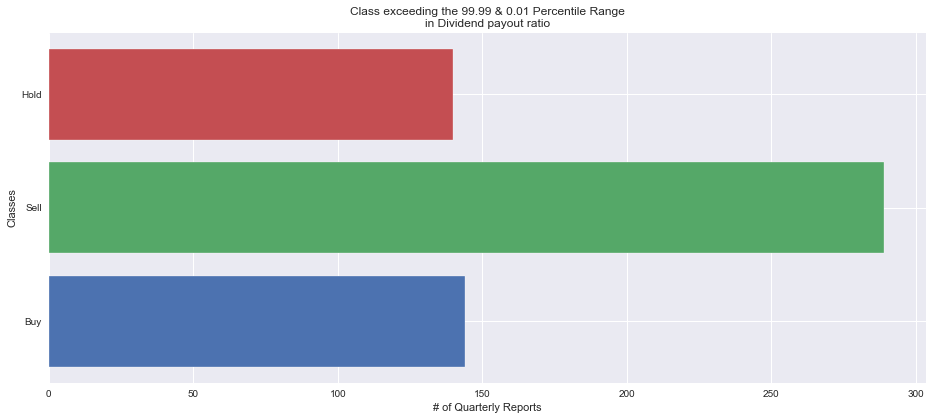

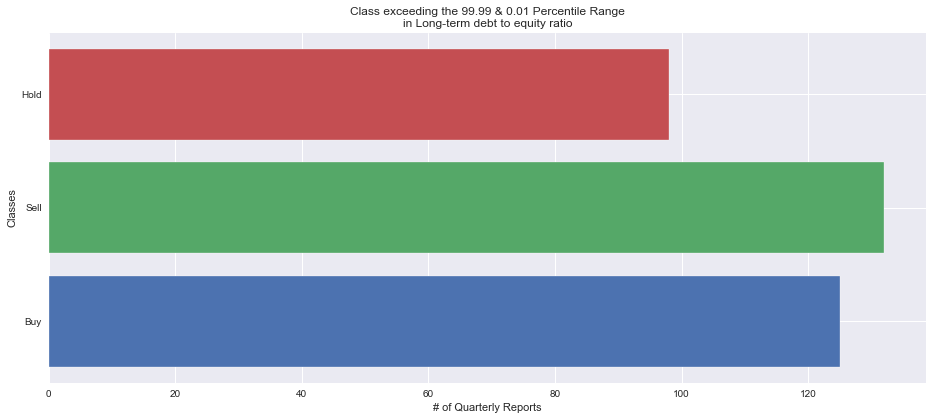

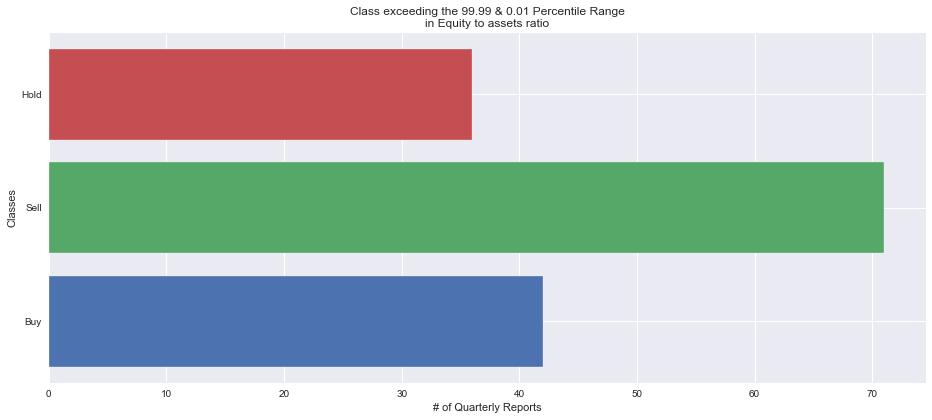

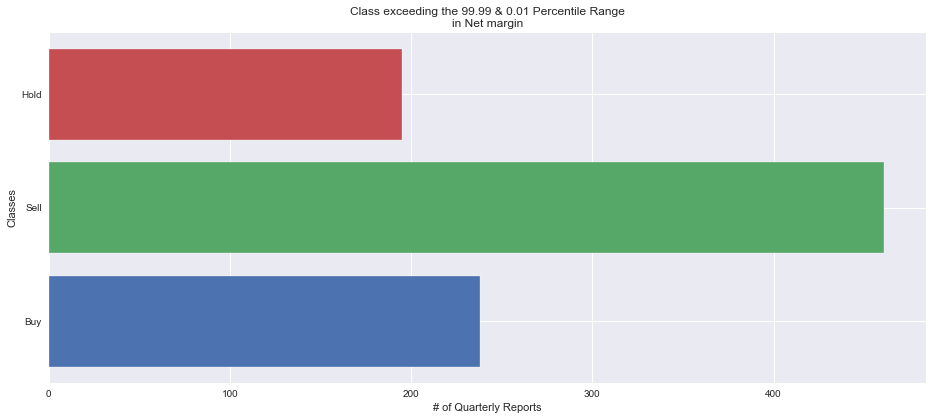

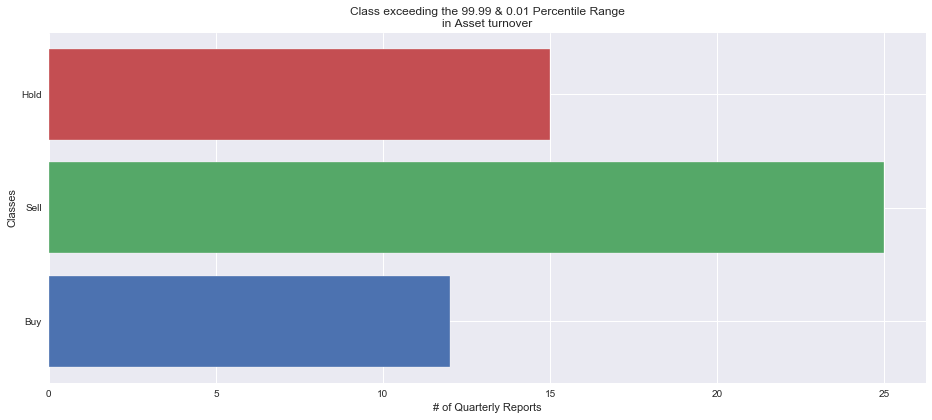

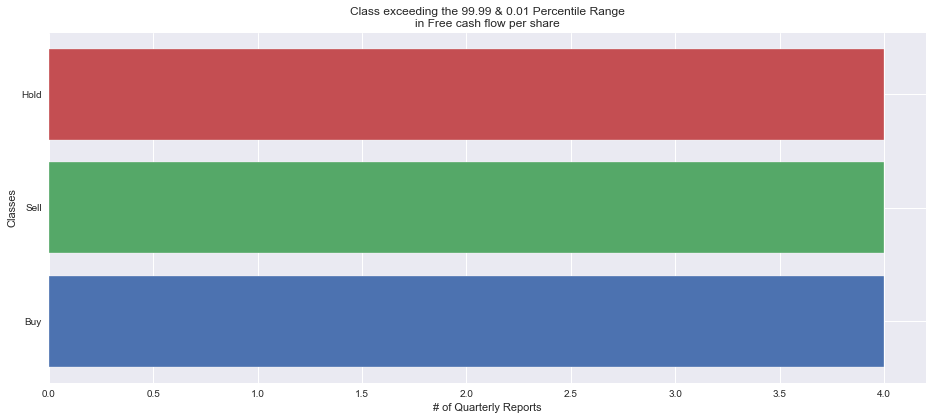

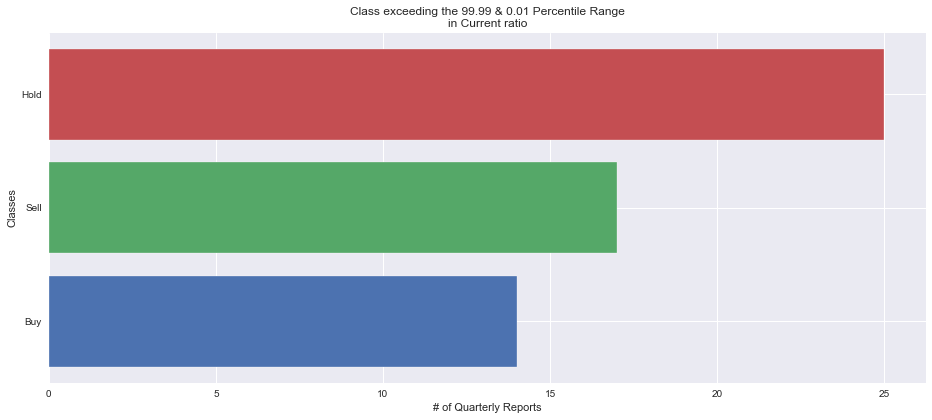

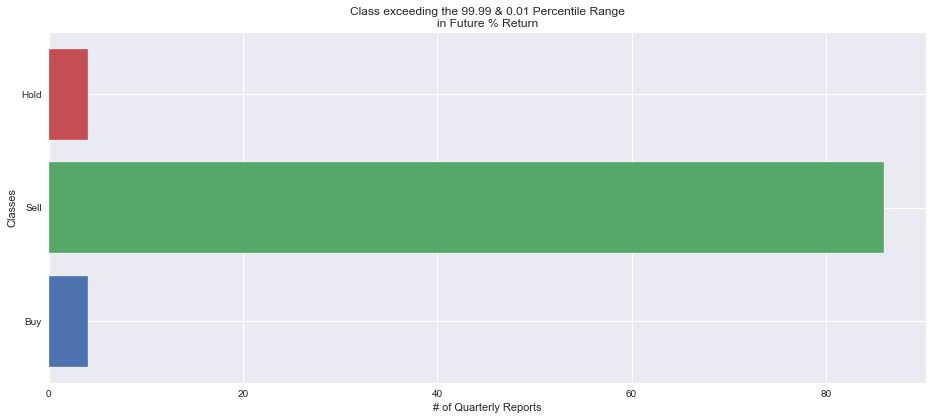

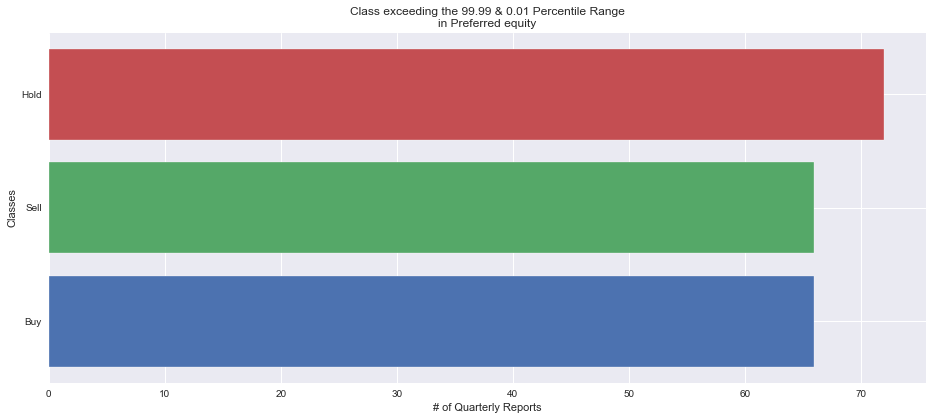

In [14]:
plt.style.use('seaborn')

# Plotting the features for each class
for i in buy_df.columns:
    plt.figure(figsize=(14,6))
    
    # Threshold to pass to see how prevalent each class is in each feature
    thres1 = 0.9999
    thres2 = 0.0001

    # Plotting the classes
    plt.barh("Buy", buy_df[(buy_df[i]>=buy_df[i].quantile(thres1)) | (buy_df[i]<=buy_df[i].quantile(thres2))].shape[0])
    plt.barh("Sell", sell_df[(sell_df[i]>=sell_df[i].quantile(thres1)) | (sell_df[i]<=sell_df[i].quantile(thres2))].shape[0])
    plt.barh("Hold", hold_df[(hold_df[i]>=hold_df[i].quantile(thres1)) | (hold_df[i]<=hold_df[i].quantile(thres2))].shape[0])
    
    plt.ylabel("Classes")
    plt.xlabel("# of Quarterly Reports")
    plt.title(f"Class exceeding the {thres1*100} & {thres2*100} Percentile Range\nin {i}")
    plt.show()

## Interacting the Features

In [15]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

### Scaling the Data

In [16]:
scaler = StandardScaler()

features_df = final_df.drop(["Price", "Future % Return", "Decision"], 1)

scaled_features = pd.DataFrame(scaler.fit_transform(features_df), 
                               index=features_df.index, 
                               columns=features_df.columns)

scaled_features.head(10)

,Shares,Shares split adjusted,Assets,Current Assets,Liabilities,Current Liabilities,Shareholders equity,Non-controlling interest,Goodwill & intangibles,Long-term debt,Revenue,Earnings,Earnings available for common stockholders,EPS basic,EPS diluted,Dividend per share,Cash from operating activities,Cash from investing activities,Cash from financing activities,Cash change during period,Cash at end of period,Capital expenditures,Price high,Price low,ROE,ROA,Book value of equity per share,P/B ratio,P/E ratio,Cumulative dividends per share,Dividend payout ratio,Long-term debt to equity ratio,Equity to assets ratio,Net margin,Asset turnover,Free cash flow per share,Current ratio,Preferred equity
6,-0.088444,-0.000676,-0.543171,-0.004771,-0.381781,-0.010679,0.010522,-0.012580,-0.023069,-0.007856,-0.004957,-0.011072,0.004365,-0.078792,-0.080020,-0.029479,0.004911,-0.004618,-0.005092,-0.004704,-0.004998,-0.006637,-0.314901,-0.427977,-0.050567,-0.077455,0.005519,-0.254119,-0.007484,-0.100038,-0.041957,-0.021008,0.309611,-0.115114,-0.742644,-0.531985,-0.009490,-0.004806
12,-0.122602,-0.045563,-0.265044,-0.004790,-0.061384,-0.010653,-0.032302,-0.012580,-0.017490,-0.007856,-0.004893,-0.008260,0.004625,-0.029348,-0.029466,-0.029479,0.005267,-0.004656,-0.004552,-0.004548,-0.005075,-0.006637,-0.268659,-0.218458,-0.004187,-0.011712,-0.039321,-0.126685,-0.007484,-0.100038,-0.041957,-0.019805,-0.066788,-0.027399,0.108825,0.060919,-0.009540,-0.004806
14,-0.116207,-0.037159,0.099850,-0.004770,0.018057,-0.010645,0.015034,-0.012580,-0.013878,-0.007856,-0.004876,-0.009344,0.004525,-0.048618,-0.048782,-0.029479,0.004766,-0.004651,-0.004551,-0.004967,-0.005010,-0.006627,0.188490,0.343728,0.002054,-0.005944,0.014912,0.929876,-0.007484,-0.100038,-0.041957,-0.022270,-0.059975,-0.027399,0.239603,-0.101076,-0.009538,-0.004806
18,-0.109936,-0.028918,0.076586,-0.004769,-0.032075,-0.010649,0.037212,-0.012580,-0.005162,-0.007856,-0.004910,-0.007337,0.004711,-0.016589,-0.010341,-0.029479,0.006096,-0.004647,-0.004548,-0.004410,-0.004992,-0.007234,-0.236232,-0.211765,0.016565,0.031590,0.039072,-0.201411,-0.007484,-0.100038,-0.041957,-0.023306,0.047664,0.018583,-0.037135,0.476629,-0.009535,-0.004806
23,-0.068684,0.025292,0.807638,-0.004769,0.490165,-0.010667,0.006200,-0.012580,-0.013281,-0.007820,-0.002232,0.292681,0.032538,5.591615,6.875991,-0.029479,0.005006,-0.005541,-0.004474,-0.004887,-0.004983,-0.006859,0.025335,0.287995,0.853976,1.334522,-0.002606,-0.066437,-0.007484,-0.100038,-0.041957,-0.020666,-0.429123,2.151963,-0.332087,-0.058892,-0.009512,-0.004806
32,-0.194231,-0.139694,-0.015507,-0.004773,0.008118,-0.010639,-0.013521,-0.012580,-0.013665,-0.007879,-0.004892,-0.005456,0.004885,0.022906,0.023681,-0.029479,0.013858,-0.004679,-0.004557,-0.004869,-0.004982,-0.006588,-0.157349,-0.139094,0.013682,0.013227,-0.006861,-0.108009,-0.007484,-0.100038,-0.041957,-0.021043,-0.121131,-0.013620,0.052825,-1.214696,-0.009546,-0.004806
37,-0.096411,-0.011146,-0.166110,-0.004777,-0.081511,-0.010661,0.008944,-0.012580,-0.017594,-0.007857,-0.004909,-0.008817,0.004574,-0.038379,-0.038518,-0.029479,0.005071,-0.004669,-0.004575,-0.004586,-0.005028,-0.006627,0.247061,0.496743,-0.049913,-0.081724,0.004262,0.365653,-0.007484,-0.100038,-0.041957,-0.021988,0.062516,-0.144468,-0.166177,-0.028802,-0.009524,-0.004806
42,-0.104590,-0.021893,0.173106,-0.004761,-0.025767,-0.010646,0.089576,-0.012580,-0.014511,-0.007834,-0.004870,-0.005502,0.004881,0.019291,0.019638,-0.029479,0.005489,-0.004680,-0.004558,-0.004896,-0.005005,-0.006612,-0.095552,-0.044302,0.058017,0.091689,0.099714,-0.118149,-0.007484,-0.100038,-0.041957,-0.025345,0.214835,0.098852,0.062937,0.286519,-0.009534,-0.004806
43,-0.160764,-0.095714,-1.040107,-0.004834,-0.399205,-0.010704,0.011092,-0.020682,-0.017413,-0.007941,-0.004910,-0.007549,0.004691,-0.016589,-0.017439,-0.029479,0.005074,-0.005903,0.000986,-0.004798,-0.005043,-0.006618,0.307156,0.314823,0.011402,0.026919,0.016461,0.090141,-0.007484,-0.100038,-0.041957,-0.02285

### Polynomial Features / Interaction Terms

In [17]:
poly = PolynomialFeatures(2)

# Interacting each feature 2 times
poly_data = poly.fit_transform(features_df)

# Getting the columns from the interacted features
poly_cols = poly.get_feature_names(features_df.columns)

# Making DF from the interacted features
poly_features = pd.DataFrame(poly_data, columns=poly_cols, index=final_df.index)

# Scaling the DF of the interacted features
scaled_features = scaler.fit_transform(poly_features)

# Making a DF of the scaled interacted features
poly_scaled_features = pd.DataFrame(scaled_features, columns=poly_cols, index=final_df.index)
poly_scaled_features.head(10)

,1,Shares,Shares split adjusted,Assets,Current Assets,Liabilities,Current Liabilities,Shareholders equity,Non-controlling interest,Goodwill & intangibles,Long-term debt,Revenue,Earnings,Earnings available for common stockholders,EPS basic,EPS diluted,Dividend per share,Cash from operating activities,Cash from investing activities,Cash from financing activities,Cash change during period,Cash at end of period,Capital expenditures,Price high,Price low,ROE,ROA,Book value of equity per share,P/B ratio,P/E ratio,Cumulative dividends per share,Dividend payout ratio,Long-term debt to equity ratio,Equity to assets ratio,Net margin,...,Dividend payout ratio Long-term debt to equity ratio,Dividend payout ratio Equity to assets ratio,Dividend payout ratio Net margin,Dividend payout ratio Asset turnover,Dividend payout ratio Free cash flow per share,Dividend payout ratio Current ratio,Dividend payout ratio Preferred equity,Long-term debt to equity ratio^2,Long-term debt to equity ratio Equity to assets ratio,Long-term debt to equity ratio Net margin,Long-term debt to equity ratio Asset turnover,Long-term debt to equity ratio Free cash flow per share,Long-term debt to equity ratio Current ratio,Long-term debt to equity ratio Preferred equity,Equity to assets ratio^2,Equity to assets ratio Net margin,Equity to assets ratio Asset turnover,Equity to assets ratio Free cash flow per share,Equity to assets ratio Current ratio,Equity to assets ratio Preferred equity,Net margin^2,Net margin Asset turnover,Net margin Free cash flow per share,Net margin Current ratio,Net margin Preferred equity,Asset turnover^2,Asset turnover Free cash flow per share,Asset turnover Current ratio,Asset turnover Preferred equity,Free cash flow per share^2,Free cash flow per share Current ratio,Free cash flow per share Preferred equity,Current ratio^2,Current ratio Preferred equity,Preferred equity^2
6,0.0,-0.088444,-0.000676,-0.543171,-0.004771,-0.381781,-0.010679,0.010522,-0.012580,-0.023069,-0.007856,-0.004957,-0.011072,0.004365,-0.078792,-0.080020,-0.029479,0.004911,-0.004618,-0.005092,-0.004704,-0.004998,-0.006637,-0.314901,-0.427977,-0.050567,-0.077455,0.005519,-0.254119,-0.007484,-0.100038,-0.041957,-0.021008,0.309611,-0.115114,...,-0.013846,0.00263,0.034448,0.015534,-0.001258,-0.004934,0.000807,-0.010477,0.027184,0.007445,0.005862,0.007021,-0.003861,-0.005296,-0.016353,-0.124464,-0.504244,-0.333847,-0.002105,0.004784,-0.009046,0.147436,0.061349,0.001741,0.004373,-0.003536,1.332245,-0.009223,0.005455,-0.006832,0.005766,-0.001188,-0.009461,0.00621,-0.004771
12,0.0,-0.122602,-0.045563,-0.265044,-0.004790,-0.061384,-0.010653,-0.032302,-0.012580,-0.017490,-0.007856,-0.004893,-0.008260,0.004625,-0.029348,-0.029466,-0.029479,0.005267,-0.004656,-0.004552,-0.004548,-0.005075,-0.006637,-0.268659,-0.218458,-0.004187,-0.011712,-0.039321,-0.126685,-0.007484,-0.100038,-0.041957,-0.019805,-0.066788,-0.027399,...,-0.013846,0.00263,0.034448,0.015534,-0.001258,-0.004934,0.000807,-0.010477,0.027059,0.007445,0.006100,0.007236,-0.003861,-0.005296,-0.018362,-0.025309,-0.014071,-0.006241,-0.002134,0.004784,-0.009116,0.004860,-0.003282,0.001946,0.004373,-0.007783,0.011279,-0.008922,0.005455,-0.009878,0.005946,-0.001188,-0.009461,0.00621,-0.004771
14,0.0,-0.116207,-0.037159,0.099850,-0.004770,0.018057,-0.010645,0.015034,-0.012580,-0.013878,-0.007856,-0.004876,-0.009344,0.004525,-0.048618,-0.048782,-0.029479,0.004766,-0.004651,-0.004551,-0.004967,-0.005010,-0.006627,0.188490,0.343728,0.002054,-0.005944,0.014912,0.929876,-0.007484,-0.100038,-0.041957,-0.022270,-0.059975,-0.027399,...,-0.013846,0.00263,0.034448,0.015534,-0.001258,-0.004934,0.000807,-0.010477,0.027295,0.007445,0.005312,0.007794,-0.003860,-0.005296,-0.018372,-0.025309,-0.022138,0.004662,-0.002134,0.004784,-0.009116,0.004860,-0.003282,0.001946,0.004373,-0.007423,-0.098760,-0.008923,0.005455,-0.009736,0.005950,-0.001188,-0.009461,0.00621,-0.004771
18,0.0,-0.109936,-0.028918,0.076586,-0.004769,-0.032075,-0.010649,0.037212,-0.01

#### Comparing DF shapes to the interacted DF shape

In [18]:
# Original DF shape
print(features_df.shape)

# Final_df shape
print(final_df.shape)

# Interacted DF shape
print(poly_scaled_features.shape)

(43944, 38)
(43944, 41)
(43944, 780)


### Removing features that interacted with themselves

In [19]:
int_df = poly_scaled_features.drop([i for i in poly_scaled_features.columns if i.endswith('^2')], 1)

# Removing the "1" column
int_df = int_df.drop("1", 1)

# Reattaching the "Decision" column
int_df = int_df.join(final_df.Decision)
int_df.head(5)

,Shares,Shares split adjusted,Assets,Current Assets,Liabilities,Current Liabilities,Shareholders equity,Non-controlling interest,Goodwill & intangibles,Long-term debt,Revenue,Earnings,Earnings available for common stockholders,EPS basic,EPS diluted,Dividend per share,Cash from operating activities,Cash from investing activities,Cash from financing activities,Cash change during period,Cash at end of period,Capital expenditures,Price high,Price low,ROE,ROA,Book value of equity per share,P/B ratio,P/E ratio,Cumulative dividends per share,Dividend payout ratio,Long-term debt to equity ratio,Equity to assets ratio,Net margin,Asset turnover,...,Cumulative dividends per share Equity to assets ratio,Cumulative dividends per share Net margin,Cumulative dividends per share Asset turnover,Cumulative dividends per share Free cash flow per share,Cumulative dividends per share Current ratio,Cumulative dividends per share Preferred equity,Dividend payout ratio Long-term debt to equity ratio,Dividend payout ratio Equity to assets ratio,Dividend payout ratio Net margin,Dividend payout ratio Asset turnover,Dividend payout ratio Free cash flow per share,Dividend payout ratio Current ratio,Dividend payout ratio Preferred equity,Long-term debt to equity ratio Equity to assets ratio,Long-term debt to equity ratio Net margin,Long-term debt to equity ratio Asset turnover,Long-term debt to equity ratio Free cash flow per share,Long-term debt to equity ratio Current ratio,Long-term debt to equity ratio Preferred equity,Equity to assets ratio Net margin,Equity to assets ratio Asset turnover,Equity to assets ratio Free cash flow per share,Equity to assets ratio Current ratio,Equity to assets ratio Preferred equity,Net margin Asset turnover,Net margin Free cash flow per share,Net margin Current ratio,Net margin Preferred equity,Asset turnover Free cash flow per share,Asset turnover Current ratio,Asset turnover Preferred equity,Free cash flow per share Current ratio,Free cash flow per share Preferred equity,Current ratio Preferred equity,Decision
6,-0.088444,-0.000676,-0.543171,-0.004771,-0.381781,-0.010679,0.010522,-0.01258,-0.023069,-0.007856,-0.004957,-0.011072,0.004365,-0.078792,-0.080020,-0.029479,0.004911,-0.004618,-0.005092,-0.004704,-0.004998,-0.006637,-0.314901,-0.427977,-0.050567,-0.077455,0.005519,-0.254119,-0.007484,-0.100038,-0.041957,-0.021008,0.309611,-0.115114,-0.742644,...,0.006795,-0.009478,0.006318,0.012893,-0.004778,0.001441,-0.013846,0.00263,0.034448,0.015534,-0.001258,-0.004934,0.000807,0.027184,0.007445,0.005862,0.007021,-0.003861,-0.005296,-0.124464,-0.504244,-0.333847,-0.002105,0.004784,0.147436,0.061349,0.001741,0.004373,1.332245,-0.009223,0.005455,0.005766,-0.001188,0.00621,1
12,-0.122602,-0.045563,-0.265044,-0.004790,-0.061384,-0.010653,-0.032302,-0.01258,-0.017490,-0.007856,-0.004893,-0.008260,0.004625,-0.029348,-0.029466,-0.029479,0.005267,-0.004656,-0.004552,-0.004548,-0.005075,-0.006637,-0.268659,-0.218458,-0.004187,-0.011712,-0.039321,-0.126685,-0.007484,-0.100038,-0.041957,-0.019805,-0.066788,-0.027399,0.108825,...,0.006795,-0.009478,0.006318,0.012893,-0.004778,0.001441,-0.013846,0.00263,0.034448,0.015534,-0.001258,-0.004934,0.000807,0.027059,0.007445,0.006100,0.007236,-0.003861,-0.005296,-0.025309,-0.014071,-0.006241,-0.002134,0.004784,0.004860,-0.003282,0.001946,0.004373,0.011279,-0.008922,0.005455,0.005946,-0.001188,0.00621,1
14,-0.116207,-0.037159,0.099850,-0.004770,0.018057,-0.010645,0.015034,-0.01258,-0.013878,-0.007856,-0.004876,-0.009344,0.004525,-0.048618,-0.048782,-0.029479,0.004766,-0.004651,-0.004551,-0.004967,-0.005010,-0.006627,0.188490,0.343728,0.002054,-0.005944,0.014912,0.929876,-0.007484,-0.100038,-0.041957,-0.022270,-0.059975,-0.027399,0.239603,...,0.006795,-0.009478,0.006318,0.012893,-0.004778,0.001441,-0.013846,0.00263,0.034448,0.015534,-0.001258,-0.004934,0.000807,0.027295,0.007445,0.005312,0.007794,-0.003860,-0.005296,-0.025309,-0.022138,0.004662,-0.002134,0.004784,0.004860,-0.003282,0.001946,0.00437

### Exporting the Interaction Features DF

In [553]:
with open("inter_df.pkl", "wb") as fp:
    pickle.dump(int_df, fp)

## Feature Selection
Reducing the feature set for computational simplicity and potential improvement in accuracy.

### Filter Method

In [33]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif

In [36]:
fltr = SelectKBest(score_func=f_classif, k=2)
fltr.fit_transform(int_df.drop("Decision", 1), int_df.Decision)
len(fltr.get_support())

741